In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [153]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Clustered_with_categorical.csv")

In [3]:
user_profile.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

### Cluster Counts

<AxesSubplot:ylabel='Cluster'>

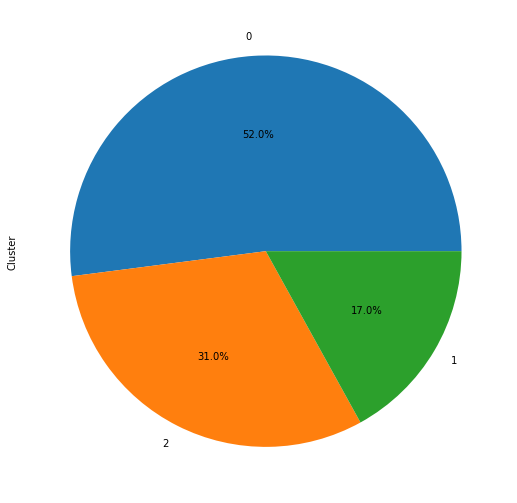

In [4]:
user_profile["Cluster"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

# Cluster analysis - Cluster 0

In [5]:
cluster_0 = user_profile[(user_profile["Cluster"]==0)]

In [6]:
cluster_0.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Cluster
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.0
mean,0.090396,0.089406,0.102266,0.101678,0.037603,0.014981,0.006112,0.003899,0.0
std,0.103823,0.105735,0.118160,0.102458,0.114038,0.066942,0.038001,0.028817,0.0
min,0.001202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.013834,0.012191,0.015993,0.019370,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.049696,0.047390,0.065640,0.077136,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.137976,0.133585,0.145310,0.156561,0.014423,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,0.948718,0.884615,0.826923,0.425000,0.487847,0.0


<AxesSubplot:>

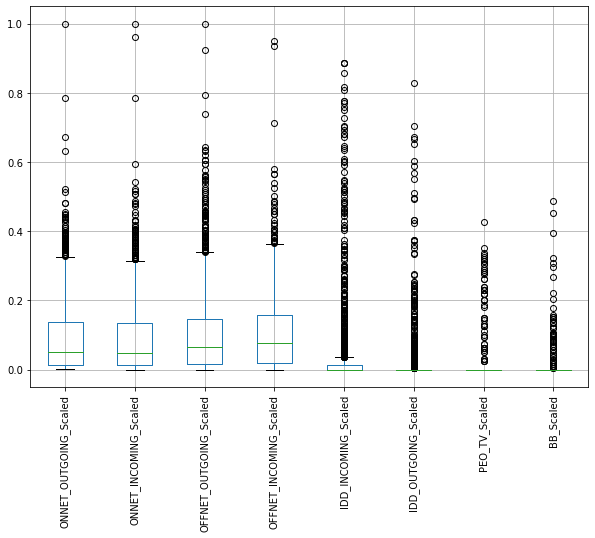

In [154]:
cluster_0.iloc[:,:34].boxplot(figsize=(10,7),rot=90)

#### Usage of randomly selected users

<AxesSubplot:>

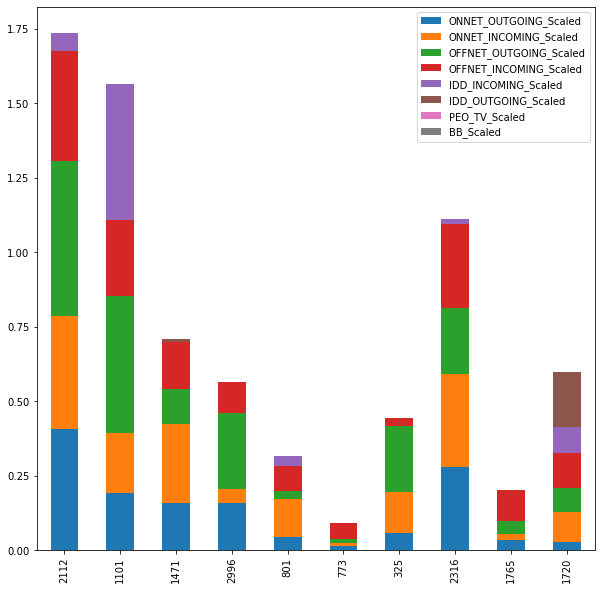

In [8]:
cluster_0.iloc[:,[2,5,8,11,14,17,21,23]].sample(n=10).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:ylabel='Density'>

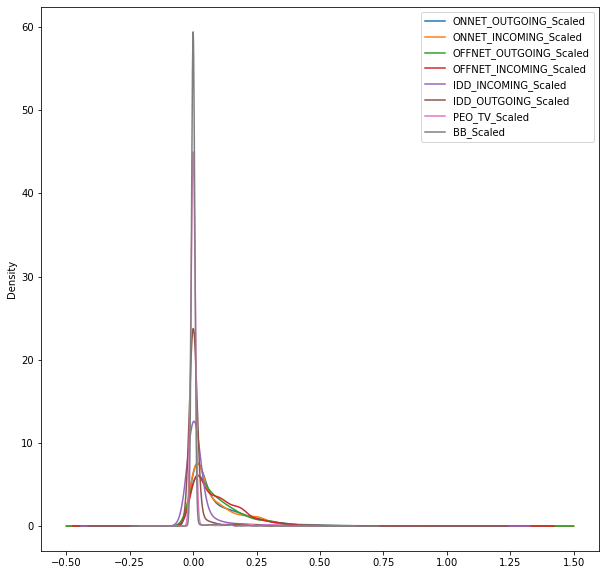

In [9]:
cluster_0.iloc[:,[2,5,8,11,14,17,21,23]].plot.kde(figsize=(10,10))

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>, <AxesSubplot:>]],
      dtype=object)

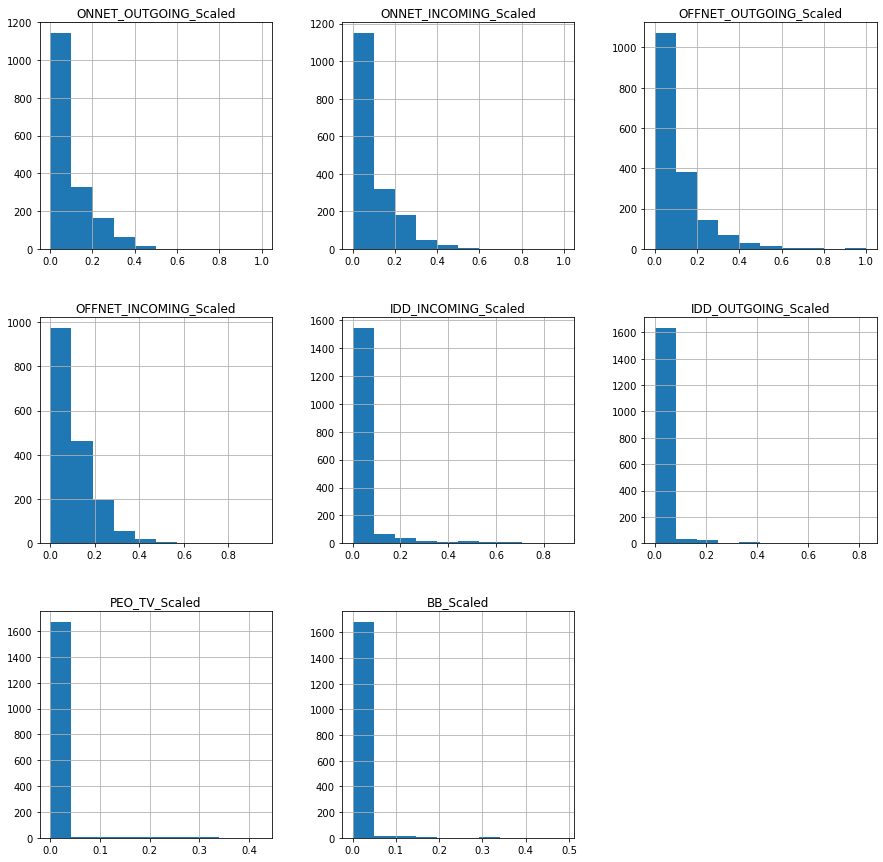

In [10]:
cluster_0.iloc[:,:34].hist(figsize=(15,15))

### Subscription Type and Usage

In [11]:
cluster_0["Play_Type"].value_counts()

SINGLE_PLAY    1663
TRIPLE_PLAY      58
Name: Play_Type, dtype: int64

In [12]:
cluster_0["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_NO', 'TV_NO']            1118
['VOICE_MEDIUM', 'BB_NO', 'TV_NO']          480
['VOICE_HIGH', 'BB_NO', 'TV_NO']             65
['VOICE_LOW', 'BB_LOW', 'TV_LOW']            46
['VOICE_MEDIUM', 'BB_LOW', 'TV_LOW']          4
['VOICE_LOW', 'BB_MEDIUM', 'TV_LOW']          3
['VOICE_LOW', 'BB_LOW', 'TV_MEDIUM']          3
['VOICE_MEDIUM', 'BB_LOW', 'TV_MEDIUM']       1
['VOICE_HIGH', 'BB_LOW', 'TV_LOW']            1
Name: Play_Usage, dtype: int64

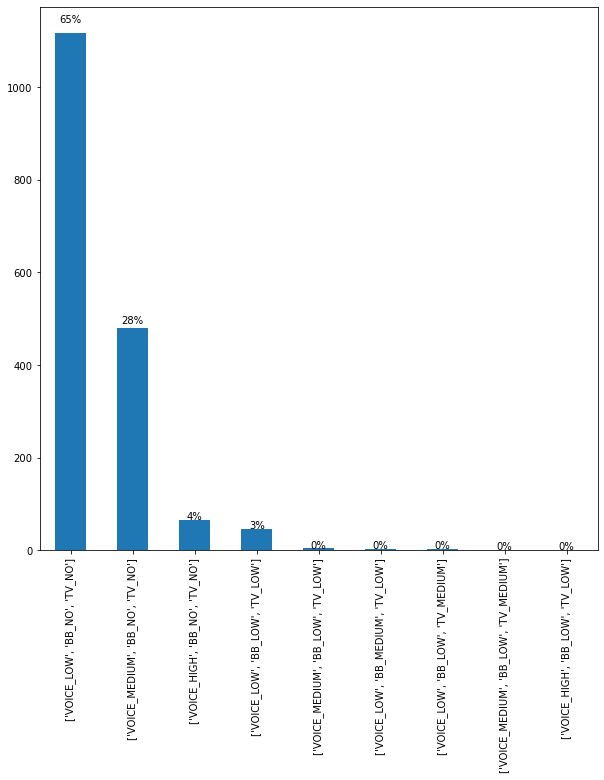

In [13]:
ax =cluster_0["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [14]:
cluster_0["VOICE_Categorical"].value_counts()

LOW       1170
MEDIUM     485
HIGH        66
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

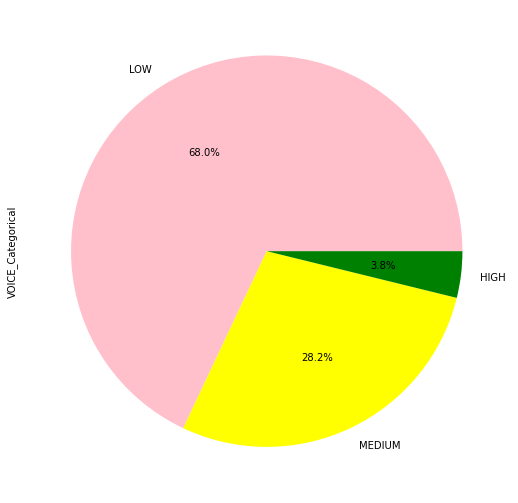

In [15]:
cluster_0["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green'] )

In [155]:
count_dict = dict(cluster_0["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)

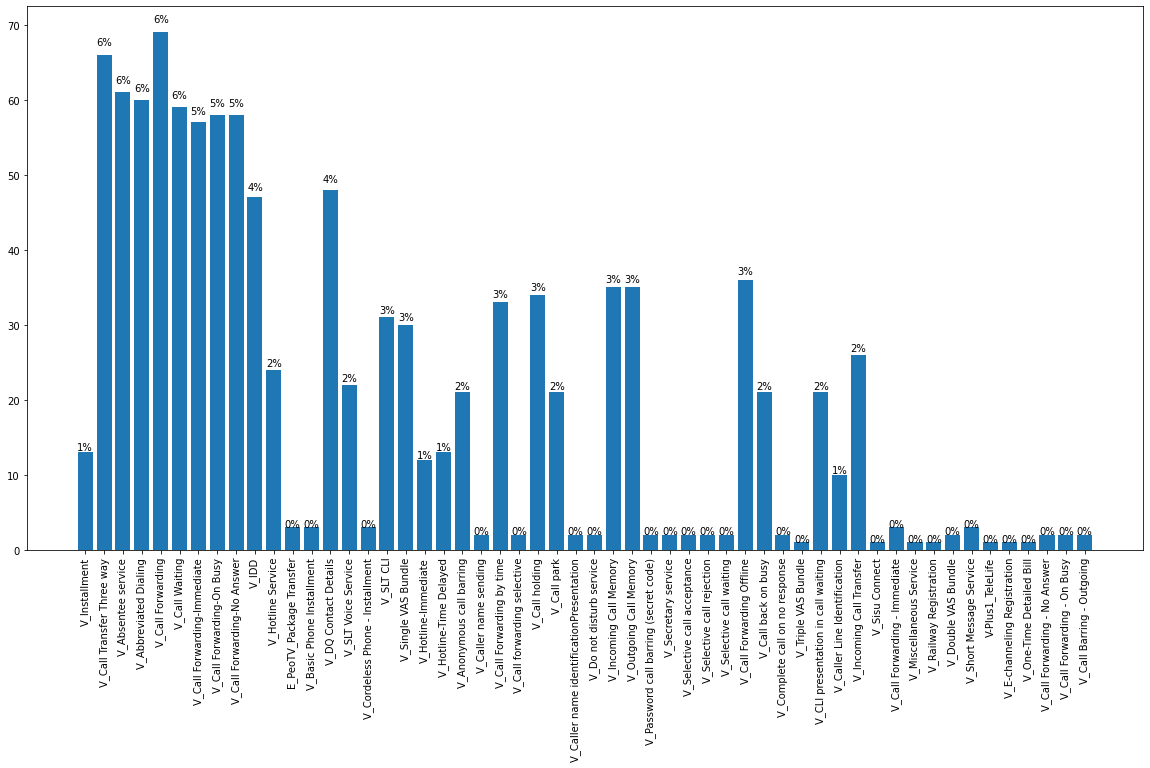

In [17]:
avp_without_no = all_voice_products_dict
avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [18]:
cluster_0["IDD_Overall_Categorical"].value_counts()

NO        1054
LOW        592
MEDIUM      38
HIGH        37
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

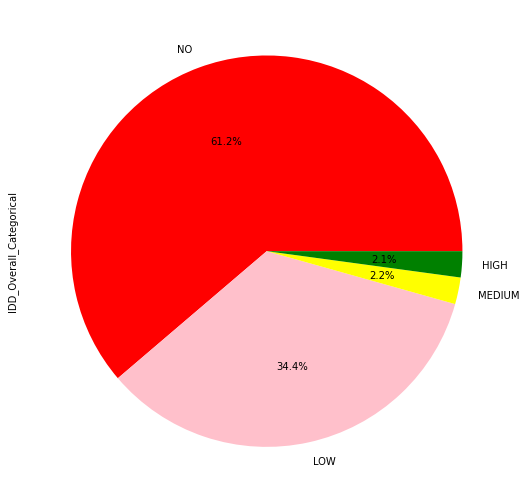

In [19]:
cluster_0["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red', 'pink','yellow','green'] )

### PeoTV Usage

In [20]:
cluster_0["PEO_TV_Categorical"].value_counts()

NO        1663
LOW         54
MEDIUM       4
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

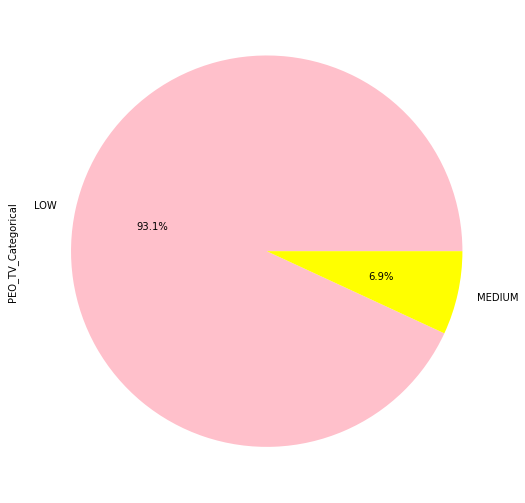

In [21]:
cluster_0_peo = cluster_0[(cluster_0["Play_Type"] == "TRIPLE_PLAY")]
cluster_0_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink','yellow','green'])

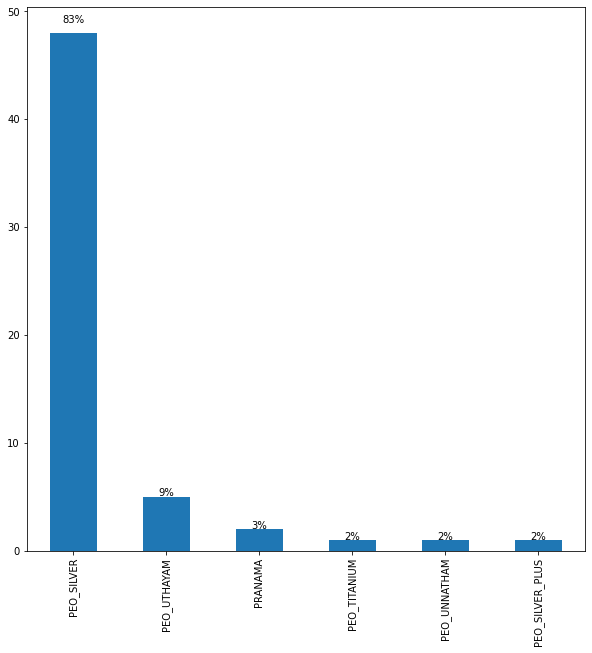

In [22]:
ax =cluster_0_peo["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [23]:
cluster_0["BB_Categorical"].value_counts()

NO        1663
LOW         55
MEDIUM       3
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

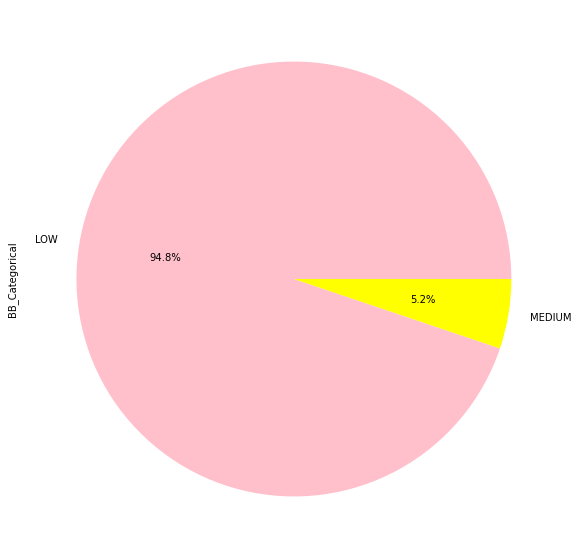

In [24]:
cluster_0_bb = cluster_0[(cluster_0["Play_Type"] == "TRIPLE_PLAY")]
cluster_0_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['pink','yellow','green'])

### User Location

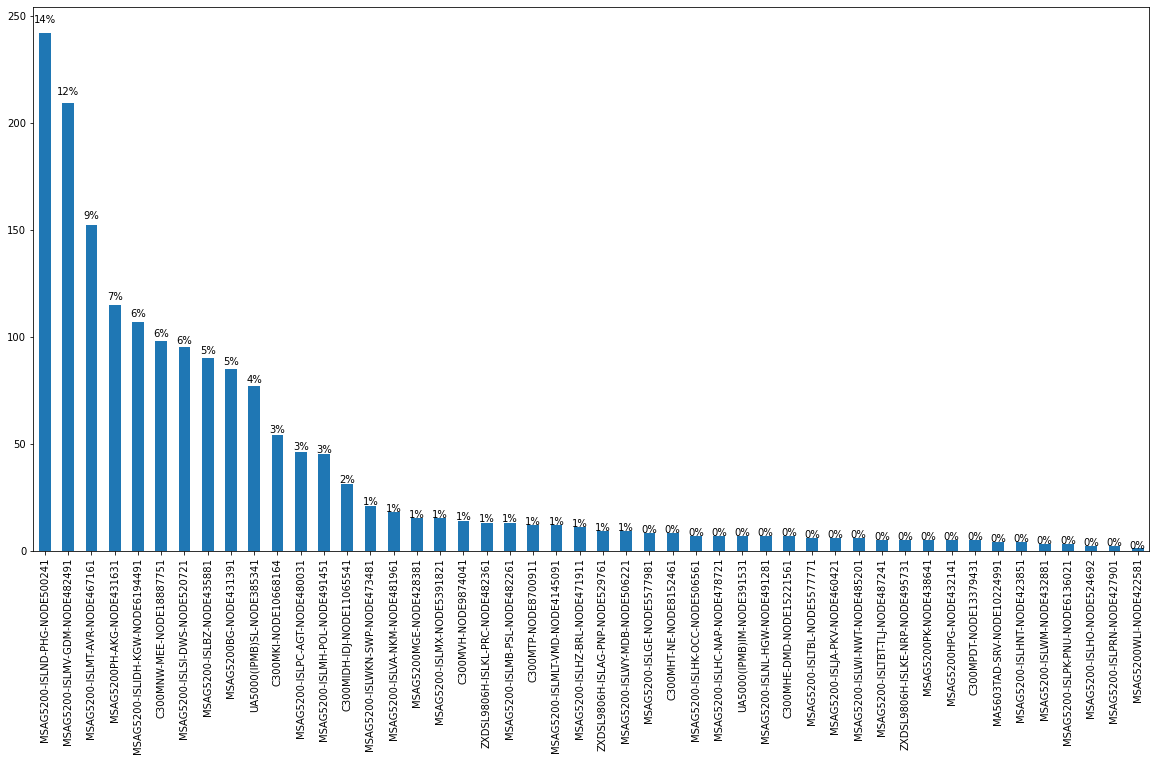

In [25]:
ax =cluster_0["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

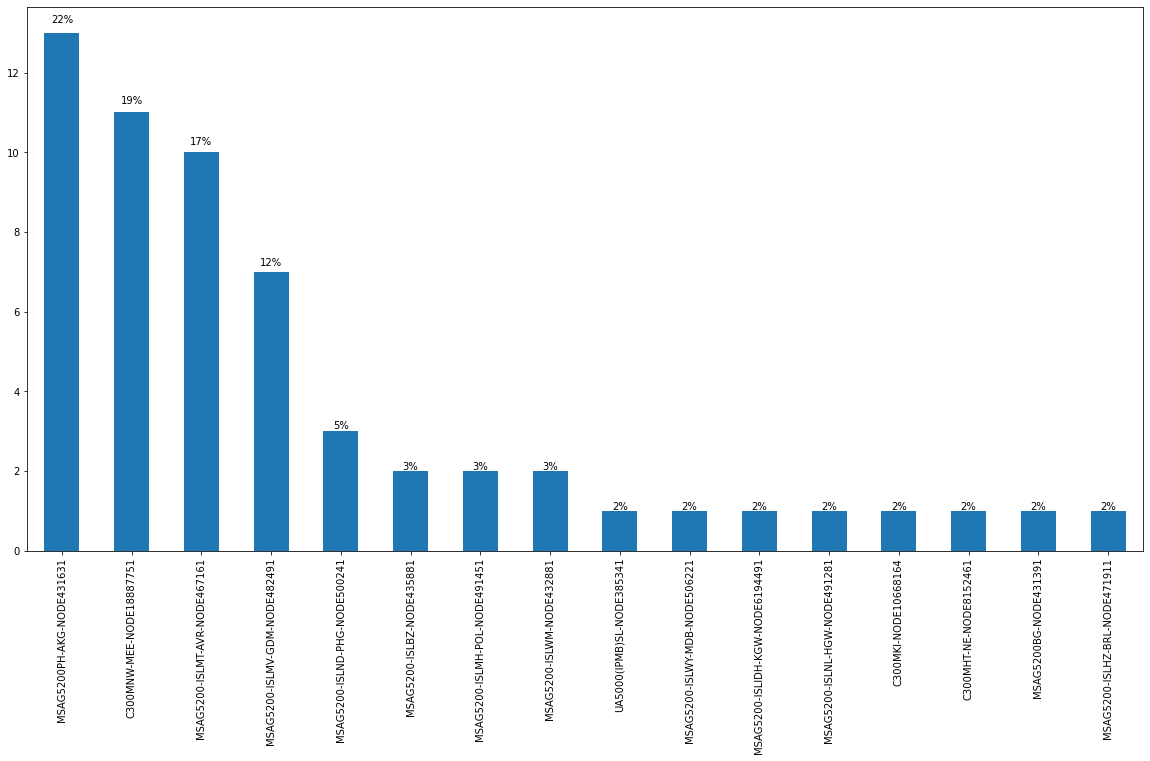

In [27]:
ax =cluster_0_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Socio-economic factors

In [28]:
cluster_0["Household_Types"].value_counts()

NO                          1684
['Family_Member_Abroad']      37
Name: Household_Types, dtype: int64

<AxesSubplot:ylabel='Household_Types'>

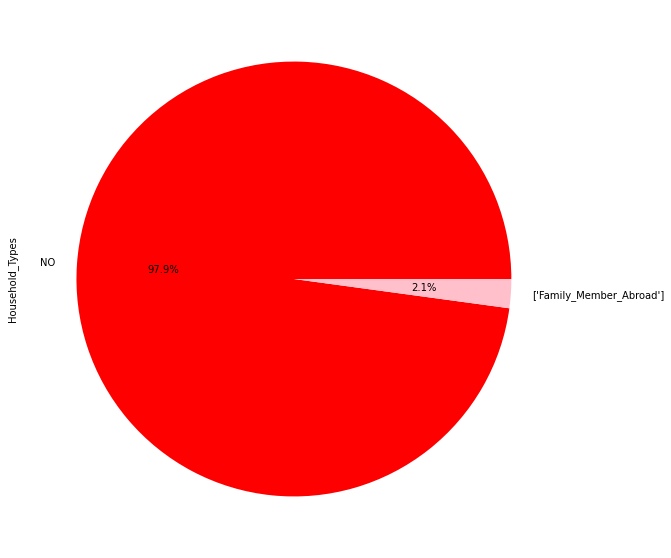

In [29]:
cluster_0["Household_Types"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["red","pink"])

In [30]:
cluster_0["Having_Insurance"].value_counts()

NO     1720
YES       1
Name: Having_Insurance, dtype: int64

## Cluster 0 - Findings

- Subscription: Signle Play (But having 60 Triple Play customers as well?)
- Subscription Usage: 
  - Voice: low Usage | **68% L** | **28% M* | **4% H**
  - BB (Overall): Very low usage | **3% Low** | **97% NO**
  - BB (Usage among Triple Play cusomers): Very Low | **95% L** | **5% M**
  - PeoTV (Overall): Very low usage | **3% L** | **97% NO**
  - PeoTV (Usage among Triple Play cusomers): Very Low | **96.7% L** | **3.3% M**
  - Triple Play Users have **very low** use of BB and PeoTV (Maybe thats why they are in this cluster?)
- IDD Usage: Low | **61% NO** | **34% LOW**
- Mostly Used Voice package - V_Call Forwarding (4%)
- Mostly used PeoTV package (among Triple Play users) - Peo Silver (83%)
- Locations - **MSAG5200** | MSAG5200-ISLND-PHG-NODE500241 (14%), MSAG5200-ISLMV-GDM-NODE482491(12%), 
- Household : Mostly No information found **97%** |  some households have family members abroad **2%**
- Only 1 User having Insurrance Coverage. This cannot be commented as we only have 2 users for whole dataset having an insurrance

# Cluster analysis - Cluster 1

In [31]:
cluster_1 = user_profile[(user_profile["Cluster"]==1)]

In [32]:
cluster_1.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Cluster
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0
mean,0.101772,0.098437,0.106371,0.114133,0.037010,0.017400,0.747861,0.406445,1.0
std,0.091440,0.093265,0.101327,0.093224,0.111117,0.080858,0.188249,0.251168,0.0
min,0.001202,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.005208,1.0
25%,0.027522,0.020948,0.026810,0.036270,0.000000,0.000000,0.618750,0.201389,1.0
50%,0.079548,0.063874,0.078493,0.101526,0.000000,0.000000,0.775000,0.364583,1.0
75%,0.152914,0.157795,0.157452,0.166331,0.012821,0.000000,0.918750,0.578125,1.0
max,0.521929,0.540865,0.667092,0.712569,0.807692,0.833333,0.975000,1.000000,1.0


<AxesSubplot:>

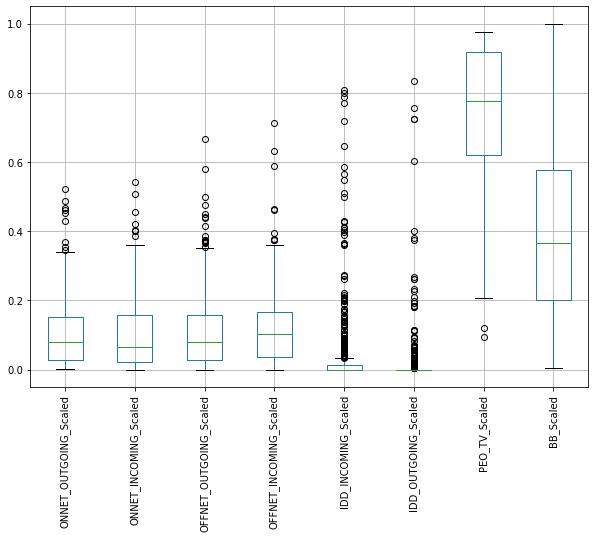

In [156]:
cluster_1.iloc[:,:34].boxplot(figsize=(10,7),rot=90)

### Usage among selected sample of users

<AxesSubplot:>

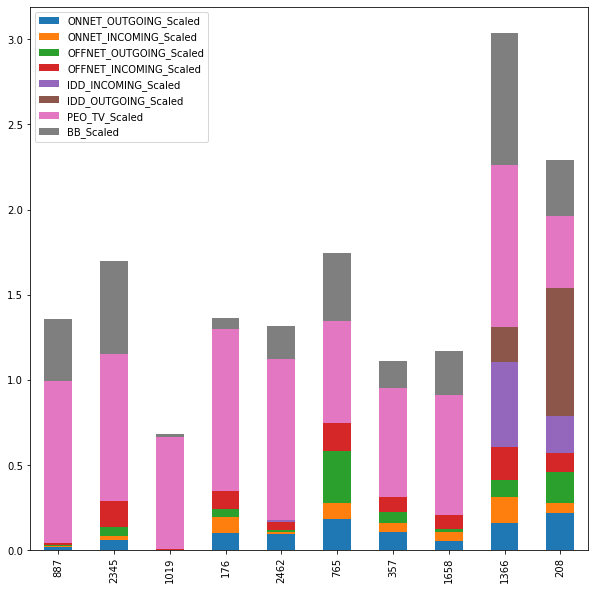

In [34]:
cluster_1.iloc[:,[2,5,8,11,14,17,21,23]].sample(n=10).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:ylabel='Density'>

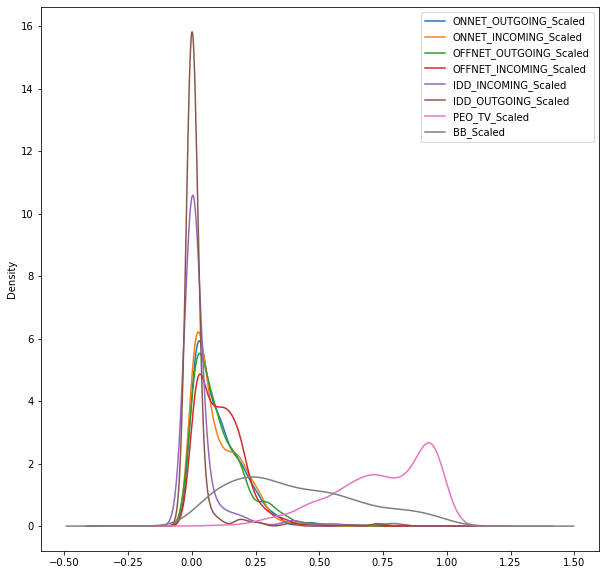

In [35]:
cluster_1.iloc[:,[2,5,8,11,14,17,21,23]].plot.kde(figsize=(10,10))

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>, <AxesSubplot:>]],
      dtype=object)

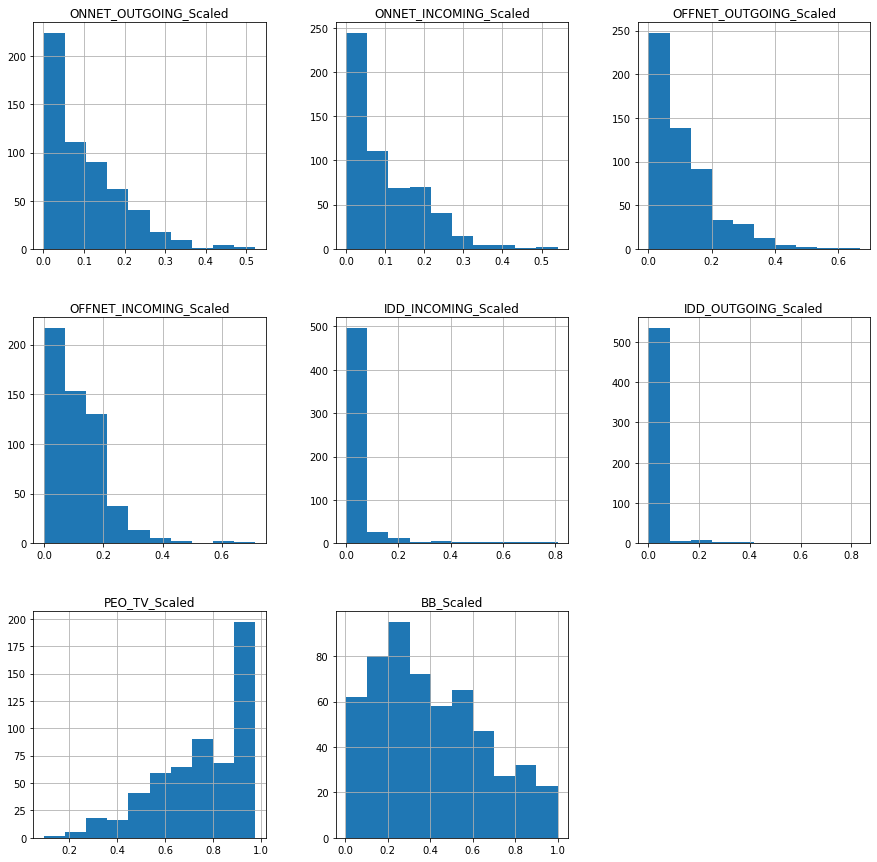

In [36]:
cluster_1.iloc[:,:34].hist(figsize=(15,15))

### Subscription Type and Usage

In [37]:
cluster_1["Play_Type"].value_counts()

TRIPLE_PLAY    561
Name: Play_Type, dtype: int64

In [38]:
cluster_1["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_LOW', 'TV_HIGH']            95
['VOICE_LOW', 'BB_MEDIUM', 'TV_HIGH']         81
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_HIGH']      70
['VOICE_MEDIUM', 'BB_LOW', 'TV_HIGH']         63
['VOICE_LOW', 'BB_LOW', 'TV_MEDIUM']          60
['VOICE_LOW', 'BB_HIGH', 'TV_HIGH']           38
['VOICE_MEDIUM', 'BB_LOW', 'TV_MEDIUM']       30
['VOICE_MEDIUM', 'BB_HIGH', 'TV_HIGH']        27
['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']       24
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_MEDIUM']    18
['VOICE_LOW', 'BB_HIGH', 'TV_MEDIUM']         17
['VOICE_MEDIUM', 'BB_HIGH', 'TV_MEDIUM']      10
['VOICE_HIGH', 'BB_LOW', 'TV_HIGH']            6
['VOICE_LOW', 'BB_HIGH', 'TV_LOW']             5
['VOICE_LOW', 'BB_MEDIUM', 'TV_LOW']           3
['VOICE_HIGH', 'BB_MEDIUM', 'TV_HIGH']         3
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_LOW']        3
['VOICE_HIGH', 'BB_HIGH', 'TV_LOW']            2
['VOICE_HIGH', 'BB_HIGH', 'TV_HIGH']           2
['VOICE_HIGH', 'BB_LOW', 'TV_MEDIUM']          2
['VOICE_LOW', 'BB_LO

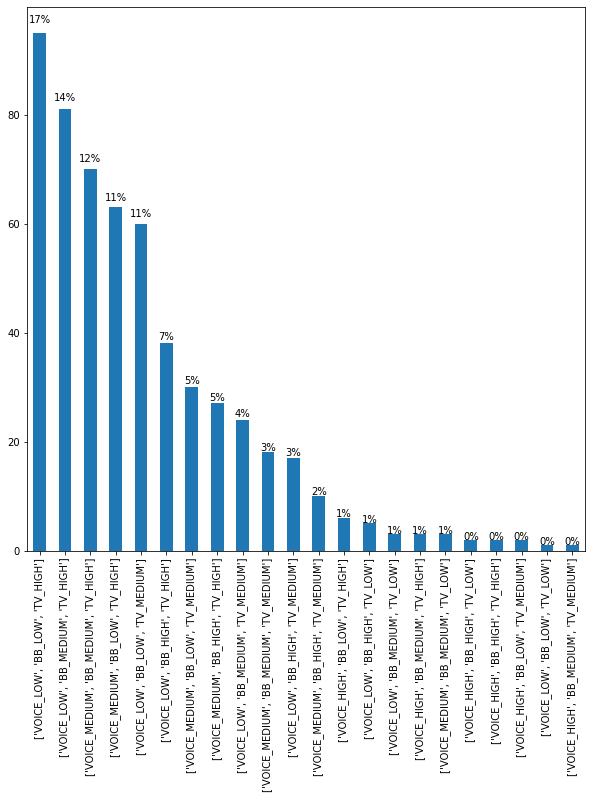

In [39]:
ax =cluster_1["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [40]:
cluster_1["VOICE_Categorical"].value_counts()

LOW       324
MEDIUM    221
HIGH       16
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

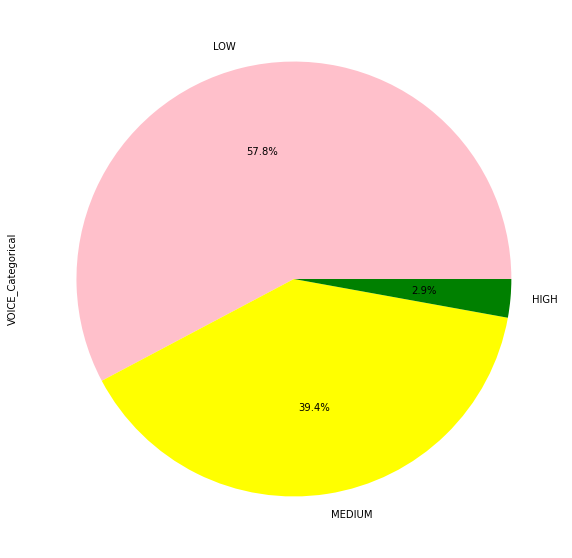

In [41]:
cluster_1["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["pink","yellow","green"])

In [157]:
count_dict = dict(cluster_1["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)

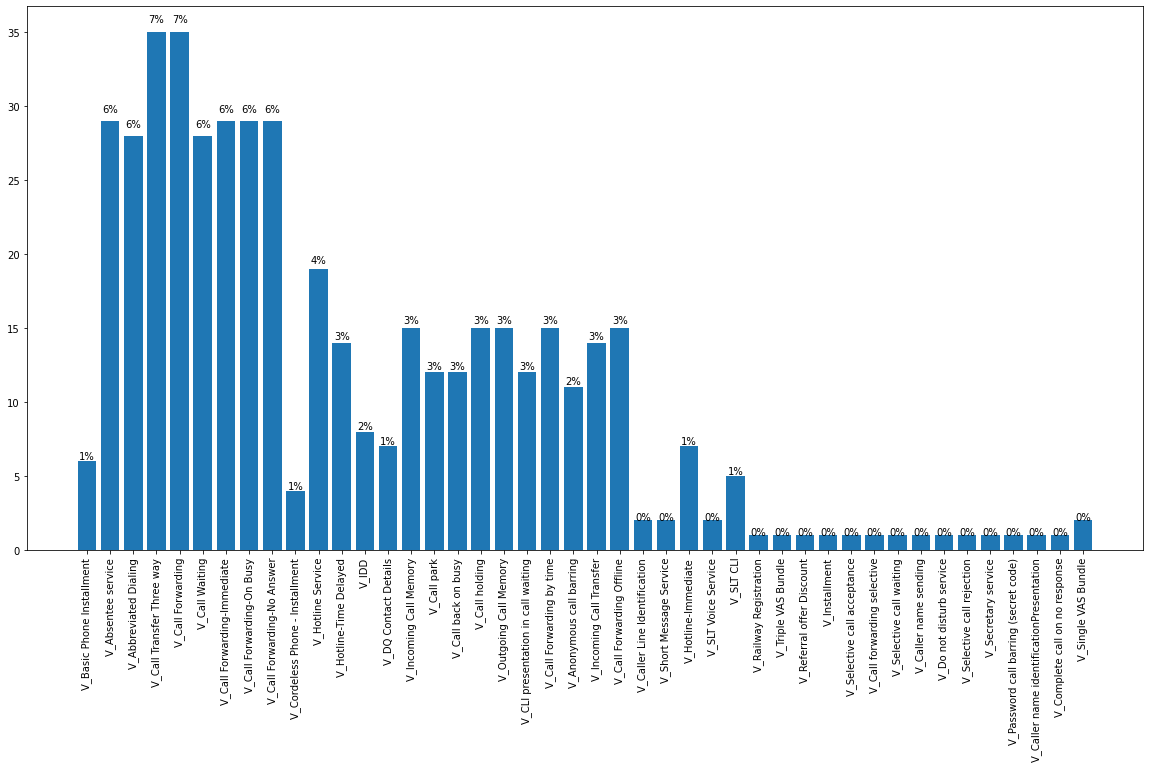

In [43]:
avp_without_no = all_voice_products_dict
avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [44]:
cluster_1["IDD_Overall_Categorical"].value_counts()

NO        333
LOW       204
HIGH       15
MEDIUM      9
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

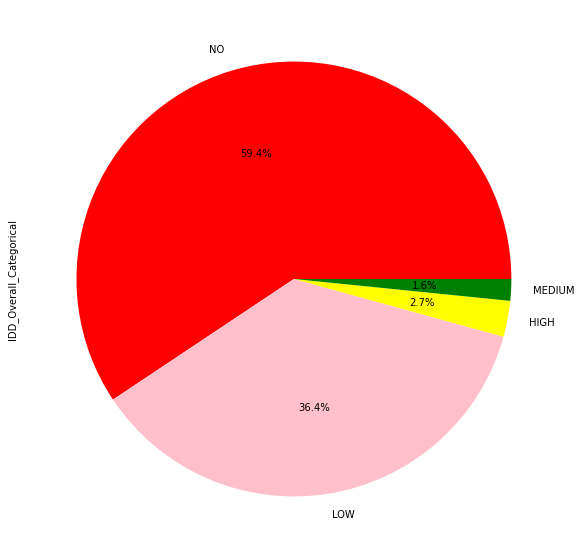

In [45]:
cluster_1["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["red","pink","yellow","green"])

### PeoTV Usage

In [46]:
cluster_1["PEO_TV_Categorical"].value_counts()

HIGH      385
MEDIUM    162
LOW        14
Name: PEO_TV_Categorical, dtype: int64

<AxesSubplot:ylabel='PEO_TV_Categorical'>

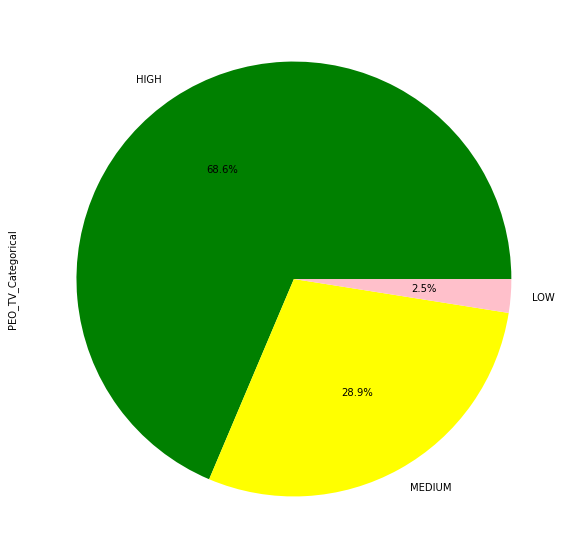

In [47]:
cluster_1["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["green","yellow","pink"])

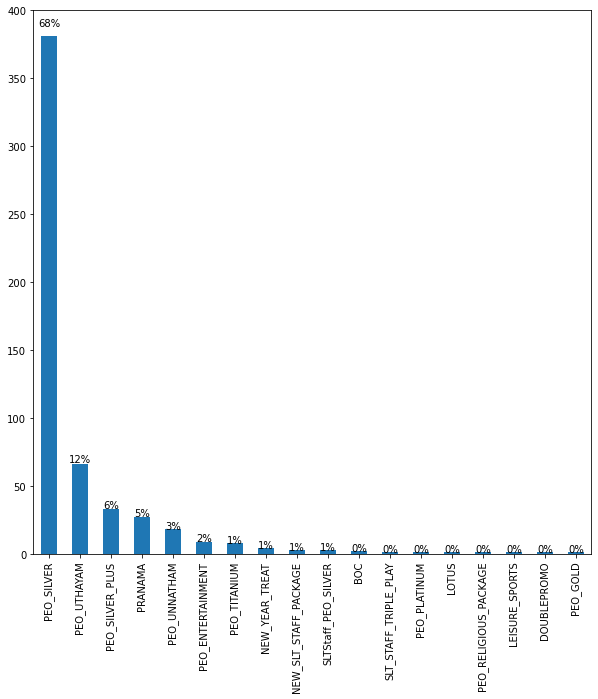

In [48]:
ax =cluster_1["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [49]:
cluster_1["BB_Categorical"].value_counts()

LOW       257
MEDIUM    203
HIGH      101
Name: BB_Categorical, dtype: int64

<AxesSubplot:ylabel='BB_Categorical'>

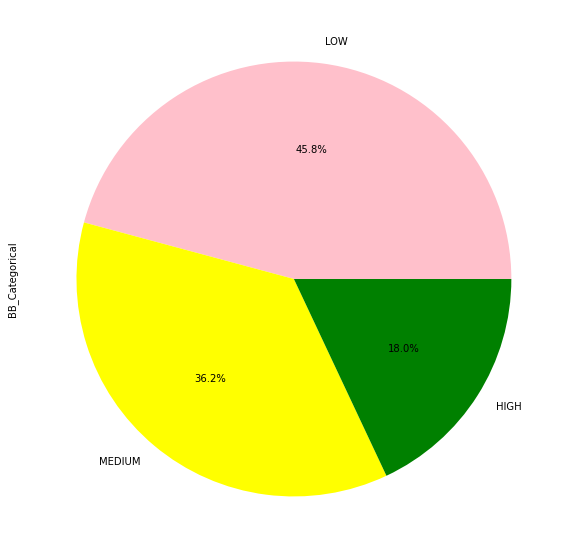

In [50]:
cluster_1["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["pink","yellow","green"])

### User Location

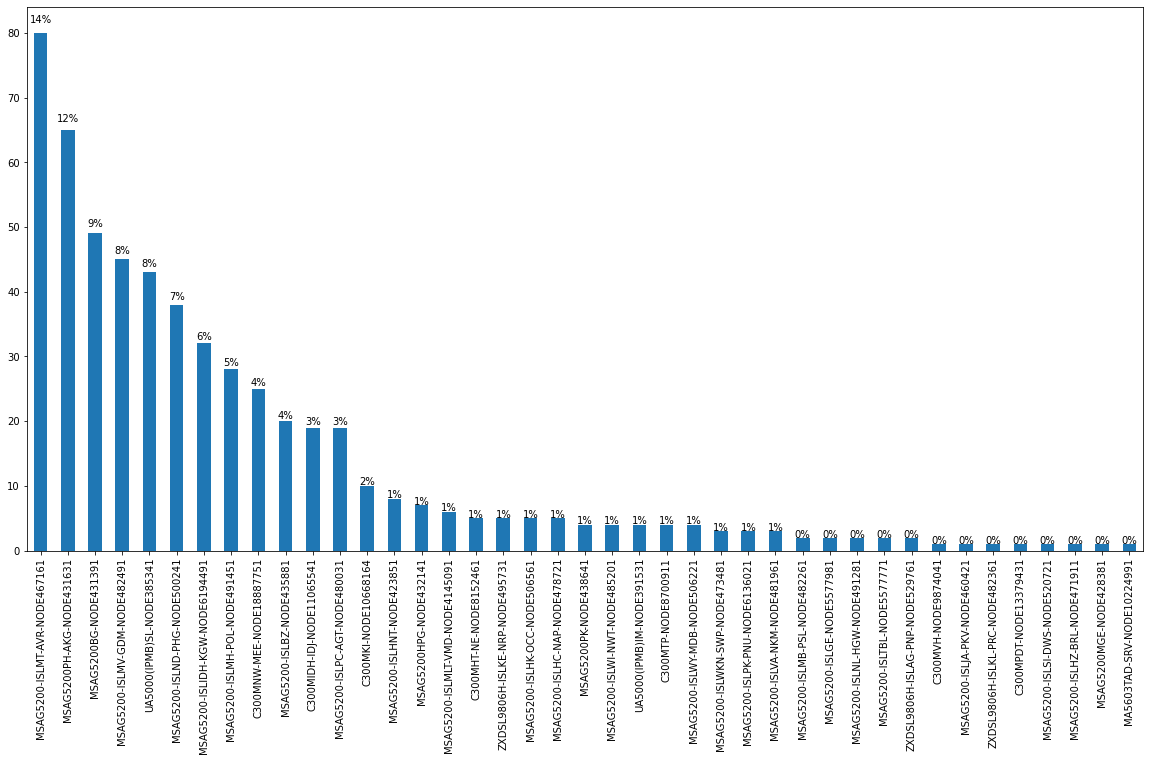

In [51]:
ax =cluster_1["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Socio-economic factors

In [53]:
cluster_1["Household_Types"].value_counts()

['Kids']                                                       301
NO                                                             140
['Kids', 'Professional_or_Student']                             62
['Professional_or_Student']                                     33
['Kids', 'Family_Member_Abroad']                                 8
['Senior_Citizen', 'Kids']                                       8
['Kids', 'Professional_or_Student', 'Family_Member_Abroad']      3
['Family_Member_Abroad']                                         2
['Senior_Citizen', 'Kids', 'Professional_or_Student']            2
['Senior_Citizen', 'Kids', 'Family_Member_Abroad']               1
['Professional_or_Student', 'Family_Member_Abroad']              1
Name: Household_Types, dtype: int64

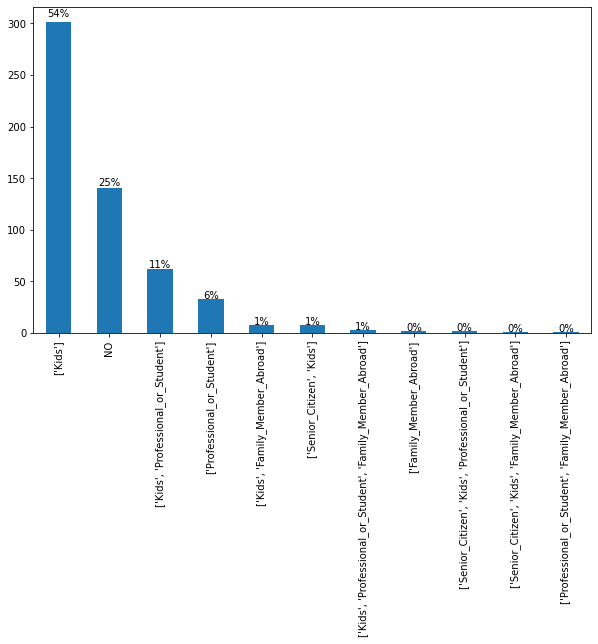

In [54]:
ax = cluster_1["Household_Types"].value_counts().plot(kind='bar', figsize=(10,6))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()
    
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [55]:
cluster_1["Having_Insurance"].value_counts()

NO    561
Name: Having_Insurance, dtype: int64

## Cluster 1 - Findings

- Subscription: Triple Play
- Subscription Usage: 
  - Peo TV **High** usage | **H 67%** | **M 28%** | **L 5%**
  - BB **Medium** usage | **H 18%** | **M 36%** | **L 45%**
  - VOICE **Low** usage | **H 3%** | **M 39%** | **L 57%**
- IDD Usage: Very low  | **No usage 59%** | **Low Usage 36%**
- Mostly used Voice package - **V_Call Transfer Three way** and **V_Call Forwarding** (4%)
- Mostly used PeoTV package - Peo_Silver (68%)
- Household : Mostly Kids and senior citizens(55%), Some probability of having Working Professional or Students (17%)
- Location : Mostly in MSAN: MSAG5200 - 65%
- No Insurrance Coverage

# Cluster analysis - Cluster 2

In [56]:
cluster_2 = user_profile[(user_profile["Cluster"]==2)]

In [57]:
cluster_2.describe()

,ONNET_OUTGOING_Scaled,ONNET_INCOMING_Scaled,OFFNET_OUTGOING_Scaled,OFFNET_INCOMING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,Cluster
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.0
mean,0.100434,0.098378,0.104891,0.102195,0.036332,0.013907,0.245049,0.197636,2.0
std,0.104874,0.106129,0.113736,0.094631,0.104220,0.061302,0.338322,0.260511,0.0
min,0.001202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.019304,0.015968,0.020801,0.026213,0.000000,0.000000,0.000000,0.000000,2.0
50%,0.063825,0.061985,0.068779,0.081019,0.000000,0.000000,0.000000,0.081597,2.0
75%,0.156937,0.151957,0.147346,0.149088,0.014423,0.000000,0.575000,0.307292,2.0
max,0.795894,0.742788,0.705357,0.640453,0.884615,0.785256,0.950000,1.000000,2.0


<AxesSubplot:>

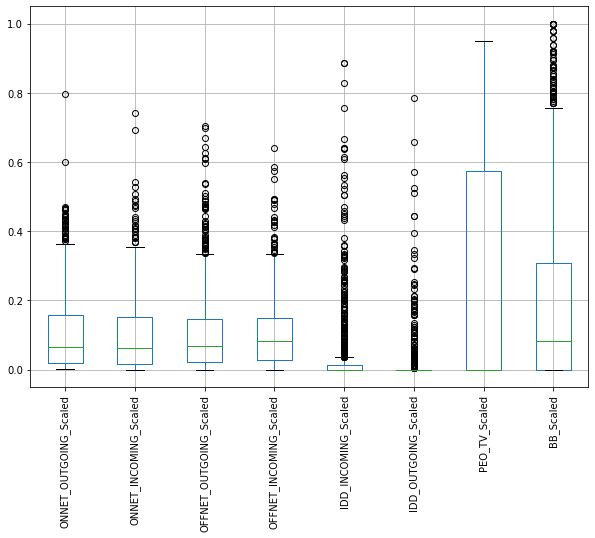

In [158]:
cluster_2.iloc[:,:34].boxplot(figsize=(10,7),rot=90)

#### Usage among sample of users

<AxesSubplot:>

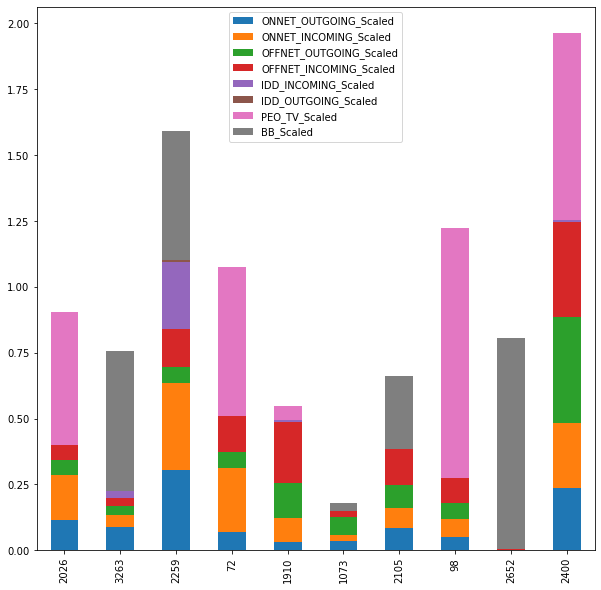

In [59]:
cluster_2.iloc[:,[2,5,8,11,14,17,21,23]].sample(n=10).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:ylabel='Density'>

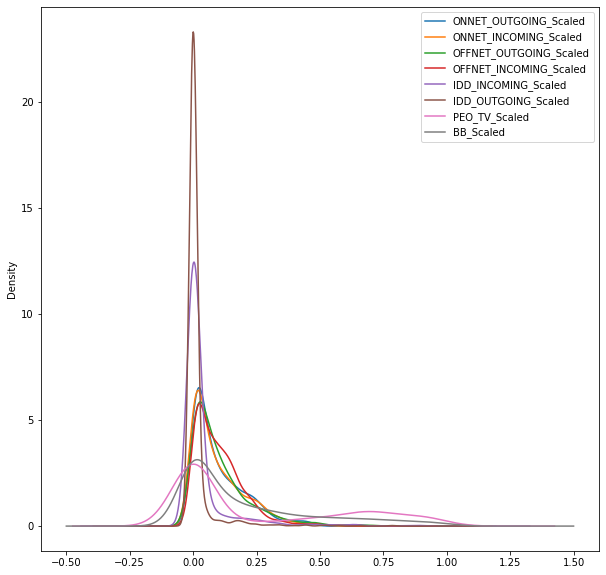

In [60]:
cluster_2.iloc[:,[2,5,8,11,14,17,21,23]].plot.kde(figsize=(10,10))

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>],
       [<AxesSubplot:title={'center':'PEO_TV_Scaled'}>,
        <AxesSubplot:title={'center':'BB_Scaled'}>, <AxesSubplot:>]],
      dtype=object)

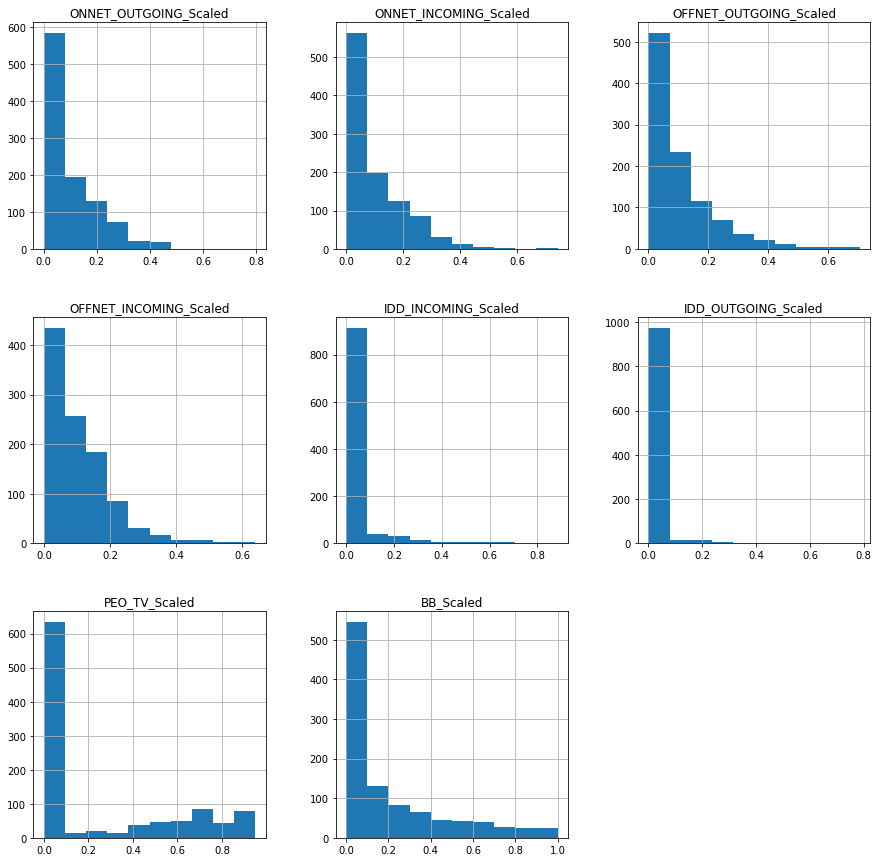

In [61]:
cluster_2.iloc[:,:34].hist(figsize=(15,15))

### Subscription Type and Usage

In [62]:
cluster_2["Play_Type"].value_counts()

DOUBLE_PLAY    1025
Name: Play_Type, dtype: int64

In [63]:
cluster_2["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_LOW', 'TV_NO']          242
['VOICE_LOW', 'BB_NO', 'TV_HIGH']         131
['VOICE_MEDIUM', 'BB_LOW', 'TV_NO']       122
['VOICE_LOW', 'BB_MEDIUM', 'TV_NO']       101
['VOICE_LOW', 'BB_NO', 'TV_MEDIUM']        80
['VOICE_MEDIUM', 'BB_NO', 'TV_HIGH']       76
['VOICE_LOW', 'BB_HIGH', 'TV_NO']          66
['VOICE_MEDIUM', 'BB_NO', 'TV_MEDIUM']     52
['VOICE_LOW', 'BB_NO', 'TV_LOW']           42
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_NO']     38
['VOICE_MEDIUM', 'BB_HIGH', 'TV_NO']       25
['VOICE_HIGH', 'BB_LOW', 'TV_NO']          16
['VOICE_MEDIUM', 'BB_NO', 'TV_LOW']        13
['VOICE_HIGH', 'BB_MEDIUM', 'TV_NO']        7
['VOICE_HIGH', 'BB_HIGH', 'TV_NO']          4
['VOICE_HIGH', 'BB_NO', 'TV_HIGH']          4
['VOICE_HIGH', 'BB_NO', 'TV_MEDIUM']        3
['VOICE_HIGH', 'BB_NO', 'TV_LOW']           3
Name: Play_Usage, dtype: int64

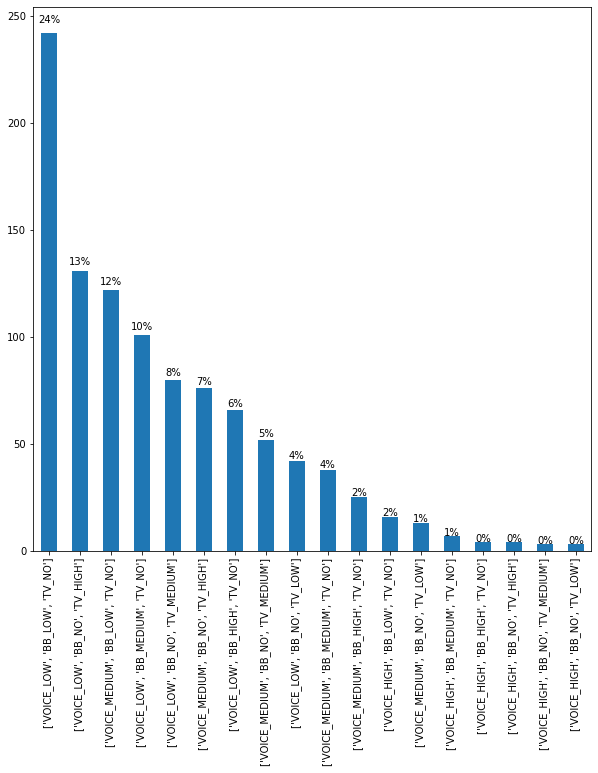

In [64]:
ax =cluster_2["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Double Play categories

{'Double Play(Voice+BB)': 621, 'Double Play(Voice+|PeoTV)': 404}


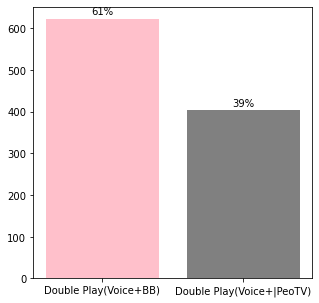

In [162]:
tv_users = cluster_2[(cluster_2["BB_Categorical"] == "NO") & (cluster_2["PEO_TV_Categorical"] != "NO")]["event_source.hash"].count()
bb_users = cluster_2[(cluster_2["BB_Categorical"] != "NO") & (cluster_2["PEO_TV_Categorical"] == "NO")]["event_source.hash"].count()
new_dict= {"Double Play(Voice+BB)": bb_users, "Double Play(Voice+|PeoTV)": tv_users}
print(new_dict)

colors=["pink","gray"]
fig,ax = plt.subplots(figsize=(5,5))
ax.bar(*zip(*new_dict.items()), color=colors)
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/1025:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

### Voice Calls Usage

In [66]:
cluster_2["VOICE_Categorical"].value_counts()

LOW       662
MEDIUM    326
HIGH       37
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

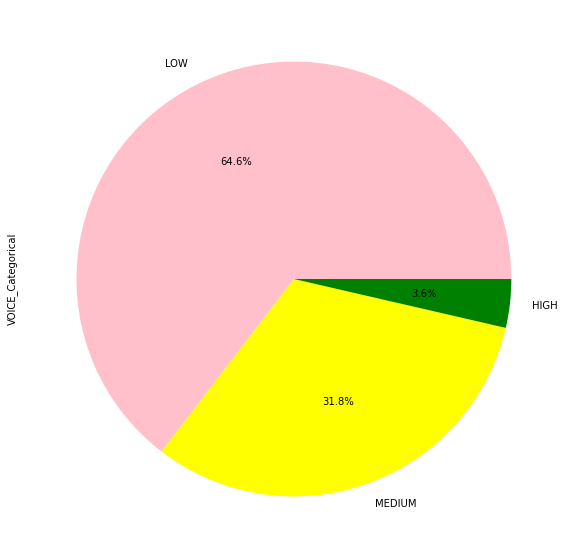

In [67]:
cluster_2["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["pink","yellow","green"])

In [163]:
count_dict = dict(cluster_2["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)

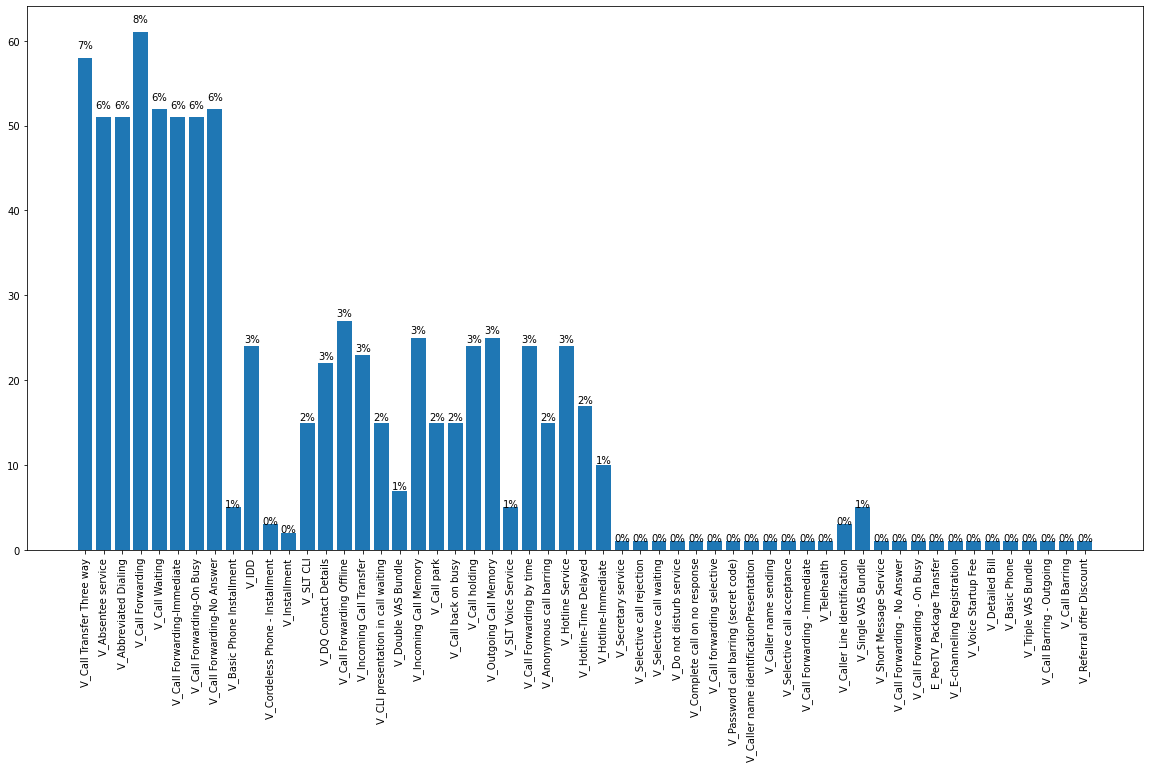

In [69]:
avp_without_no = all_voice_products_dict
avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [70]:
cluster_2["IDD_Overall_Categorical"].value_counts()

NO        625
LOW       352
MEDIUM     35
HIGH       13
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

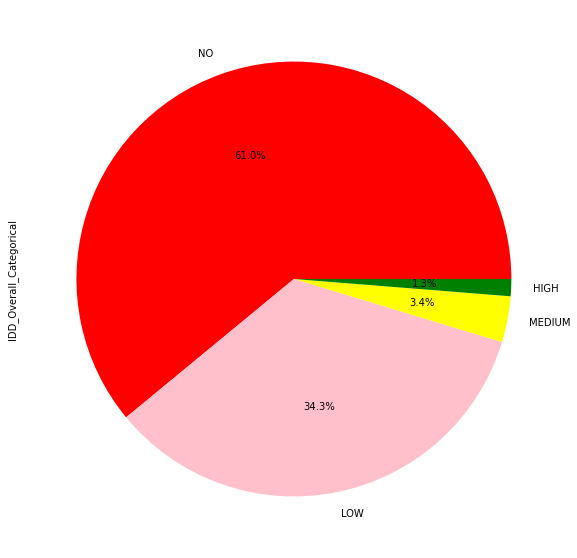

In [71]:
cluster_2["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["red","pink","yellow","green"])

### PeoTV Usage

In [72]:
cluster_2["PEO_TV_Categorical"].value_counts()

NO        621
HIGH      211
MEDIUM    135
LOW        58
Name: PEO_TV_Categorical, dtype: int64

#### Usage among All users in cluster

<AxesSubplot:ylabel='PEO_TV_Categorical'>

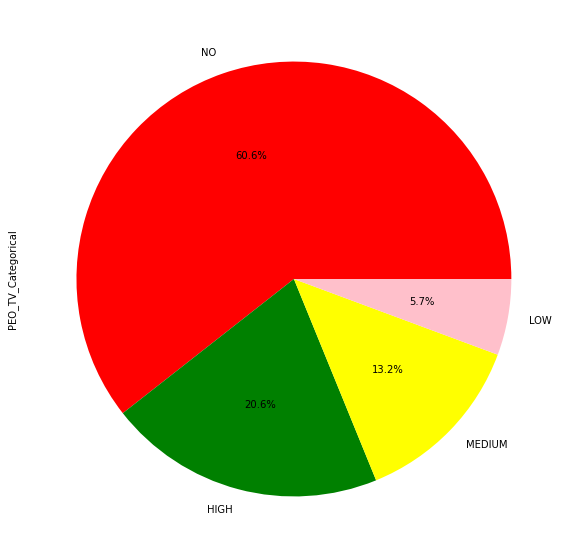

In [73]:
cluster_2["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["red","green","yellow","pink"])

#### Usage among VOICE + PeoTV Users

<AxesSubplot:ylabel='PEO_TV_Categorical'>

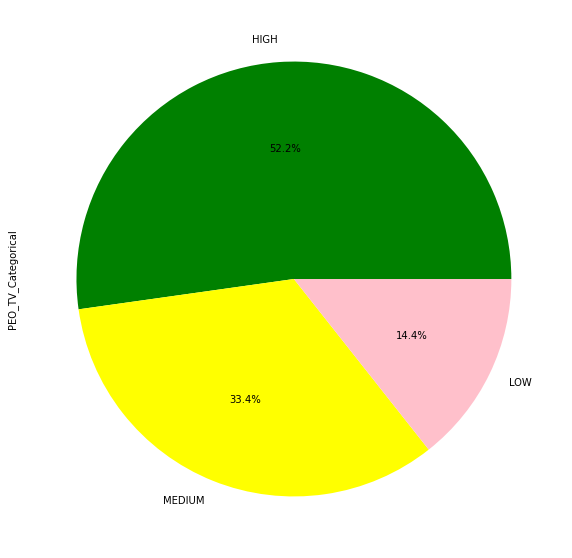

In [74]:
cluster_2_peo = cluster_2[(cluster_2["BB_Categorical"] == "NO") & (cluster_2["PEO_TV_Categorical"] != "NO")]
cluster_2_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["green","yellow","pink"])

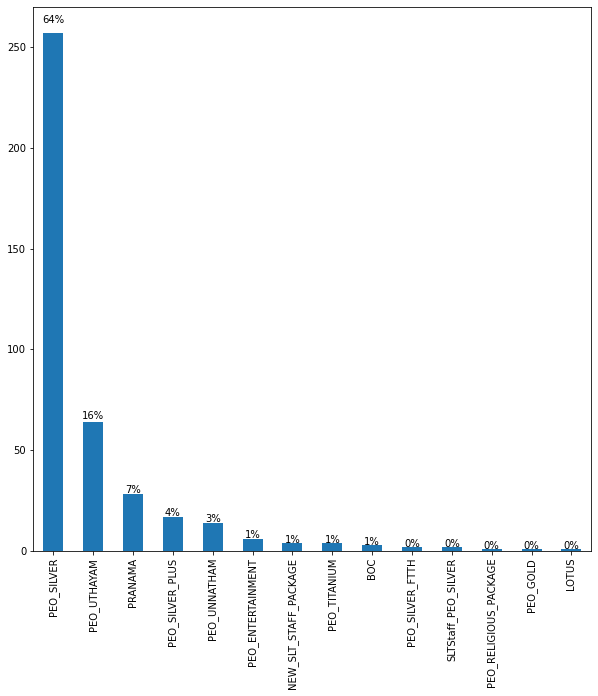

In [75]:
ax =cluster_2_peo["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [76]:
cluster_2["BB_Categorical"].value_counts()

NO        404
LOW       380
MEDIUM    146
HIGH       95
Name: BB_Categorical, dtype: int64

#### Usage among All users in cluster

<AxesSubplot:ylabel='BB_Categorical'>

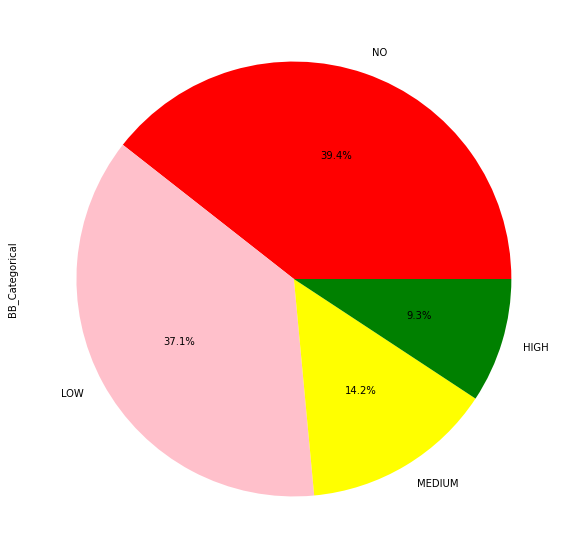

In [77]:
cluster_2["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["red","pink","yellow","green"])

#### Usage among Voice + BB Users

<AxesSubplot:ylabel='BB_Categorical'>

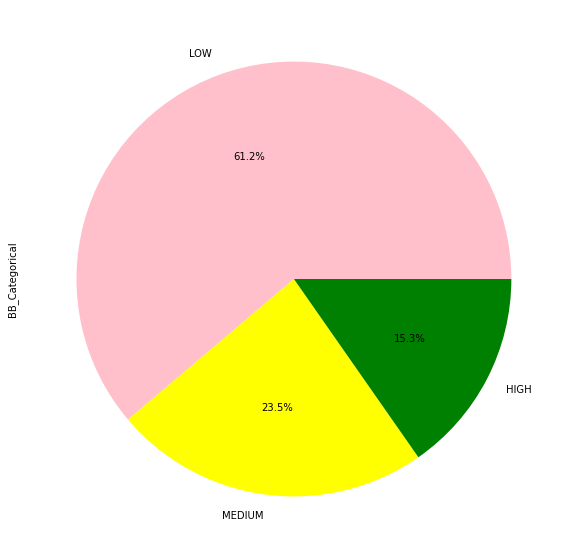

In [78]:
cluster_2_bb = cluster_2[(cluster_2["BB_Categorical"] != "NO") & (cluster_2["PEO_TV_Categorical"] == "NO")]
cluster_2_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', colors=["pink","yellow","green"])

### User Location

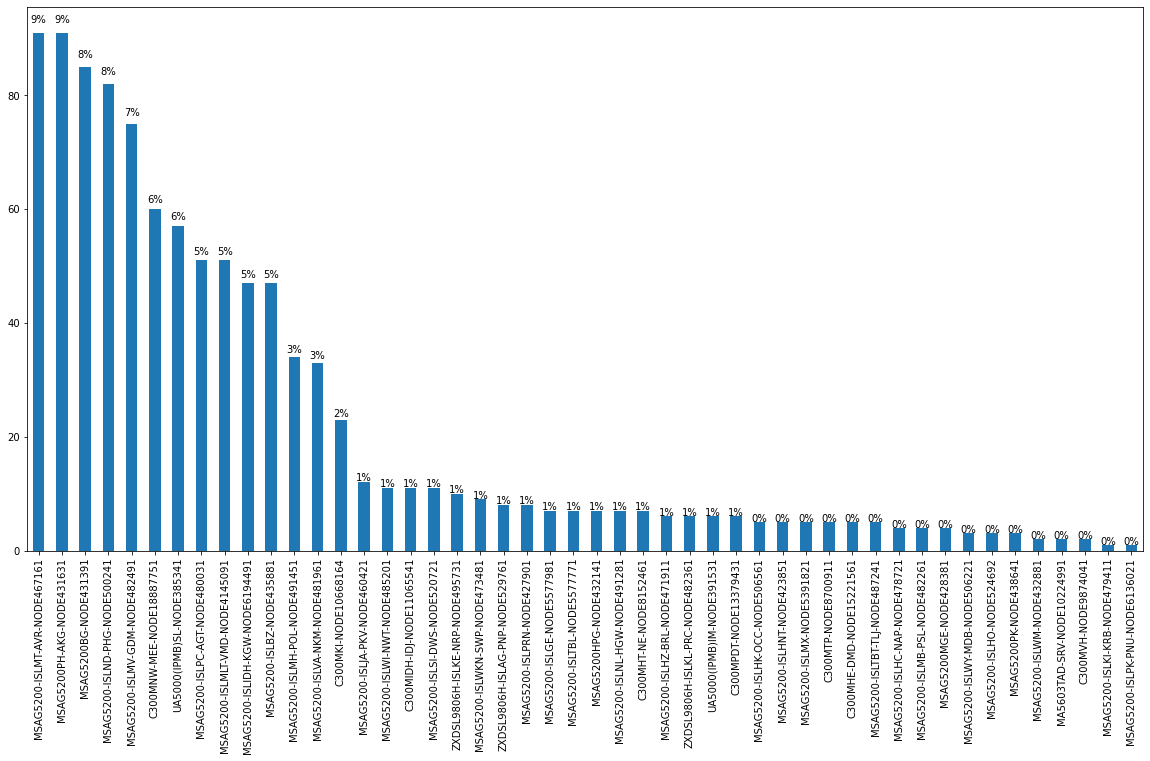

In [79]:
ax =cluster_2["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Voice + BB customers

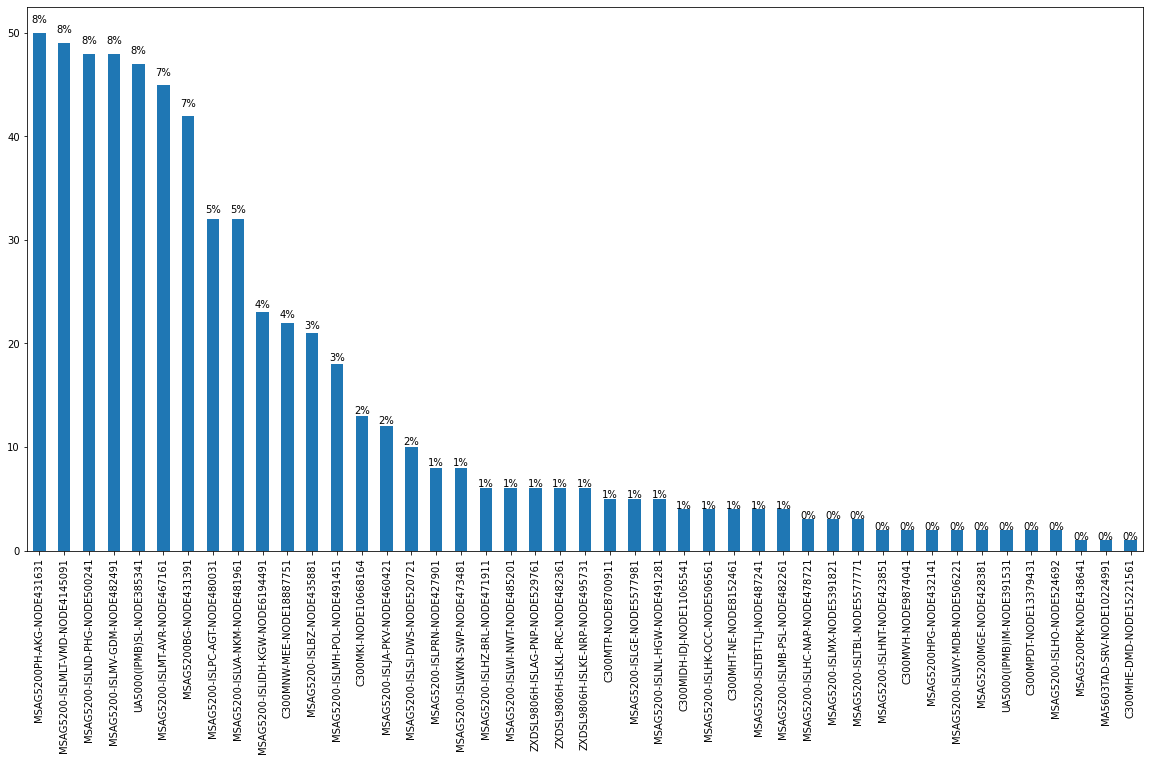

In [81]:
ax =cluster_2_bb["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Voice + peoTV customers

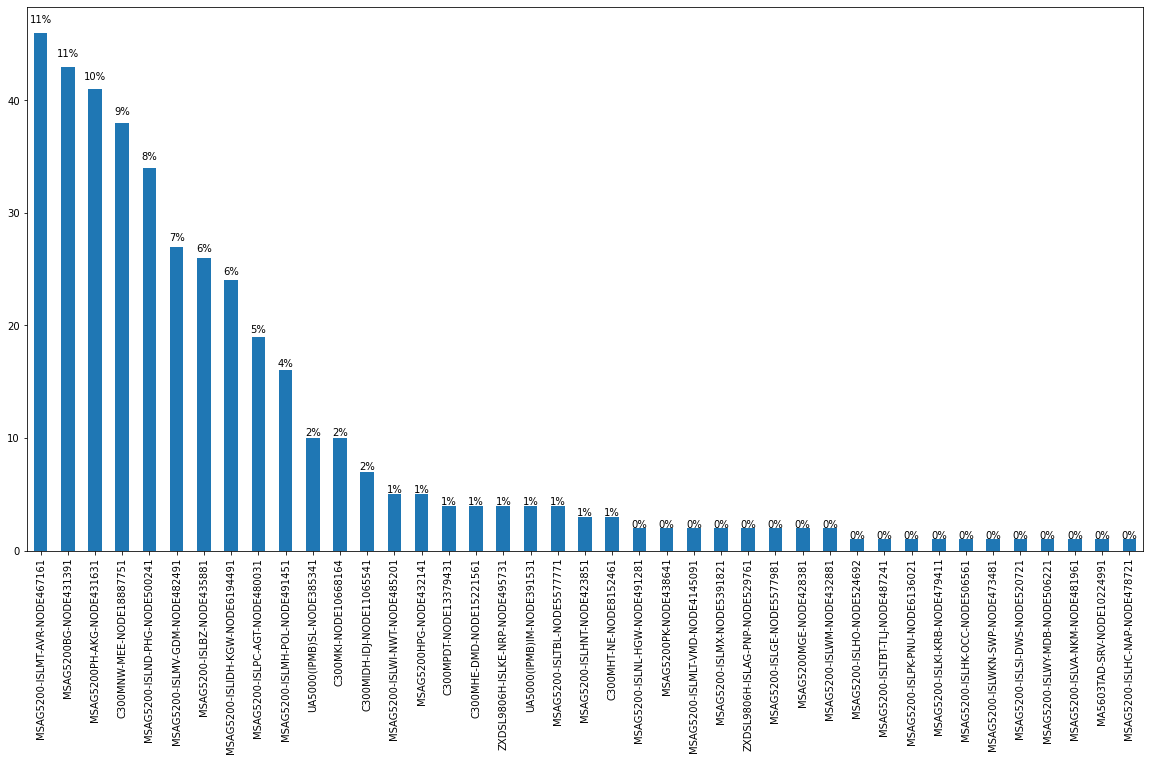

In [82]:
ax =cluster_2_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Socio-economic factors

In [83]:
cluster_2["Household_Types"].value_counts()

NO                                                     709
['Kids']                                               205
['Professional_or_Student']                             94
['Family_Member_Abroad']                                10
['Senior_Citizen', 'Kids']                               4
['Kids', 'Family_Member_Abroad']                         2
['Professional_or_Student', 'Family_Member_Abroad']      1
Name: Household_Types, dtype: int64

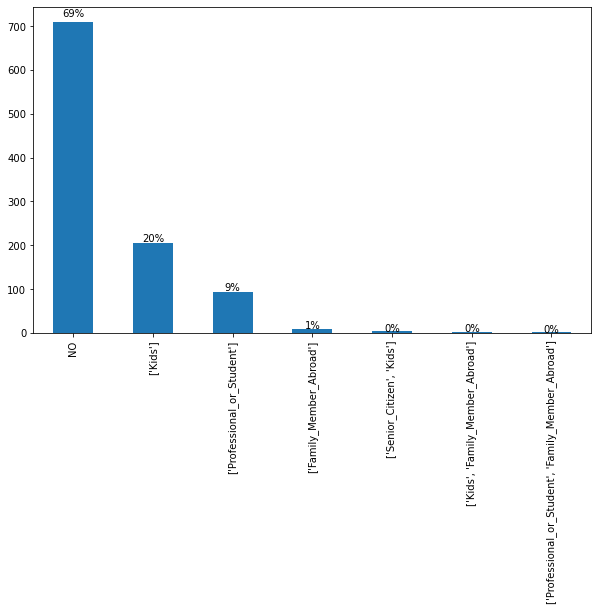

In [84]:
ax = cluster_2["Household_Types"].value_counts().plot(kind='bar', figsize=(10,6))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()
    
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [85]:
cluster_2["Having_Insurance"].value_counts()

NO     1024
YES       1
Name: Having_Insurance, dtype: int64

## Cluster 2 - Findings

- Subscription: Double Play (Voice + BB, Voice + PeoTV)
- Subscripotion Types:
  - Voice + BB Highest | **61%**
  - Voice + PeoTV Lowest | **39%**
- Subscription Usage: 
  - Voice: **Low** | **64% L** | **31% M** | **3.6% H**
  - BB (Among Voice+BB Users): Low usage | **61% L** | **23% M** | **15% H**
  - PeoTV (Among Voice+peoTV Users): High usage | **52% H** | **33% M** | **14% L**
- IDD Usage: Very Low | **61% NO** | **34% LOW**
- Mostly Used Voice package - V_Call Forwarding (4%)
- Mostly used PeoTV Package (Among Voice + PeoTV Subscribers) - Peo_Sliver (64%)
- Household : Mostly No information found **69%** | some have kids **20%** | some have professions or students **9**
- Location: Motly in MSAN : MSAG5200 (67%)
  - All Users - MSAG5200PH-AKG-NODE431631 (9%)
  - Voice + BB Users - MSAG5200PH-AKG-NODE431631 (8%)
  - Voice + PeoTV Users - MSAG5200-ISLMT-AVR-NODE467161 (11%)
- Only 1 User having Insurrance Coverage. This cannot be commented as we only have 2 users for whole dataset having an insurrance

# Inter-clusters Analysis

## Voice Usage

In [86]:
voice_usage = user_profile[["Cluster","VOICE_Categorical"]].value_counts().sort_index()
voice_usage

Cluster  VOICE_Categorical
0        HIGH                   66
         LOW                  1170
         MEDIUM                485
1        HIGH                   16
         LOW                   324
         MEDIUM                221
2        HIGH                   37
         LOW                   662
         MEDIUM                326
dtype: int64

<AxesSubplot:ylabel='None'>

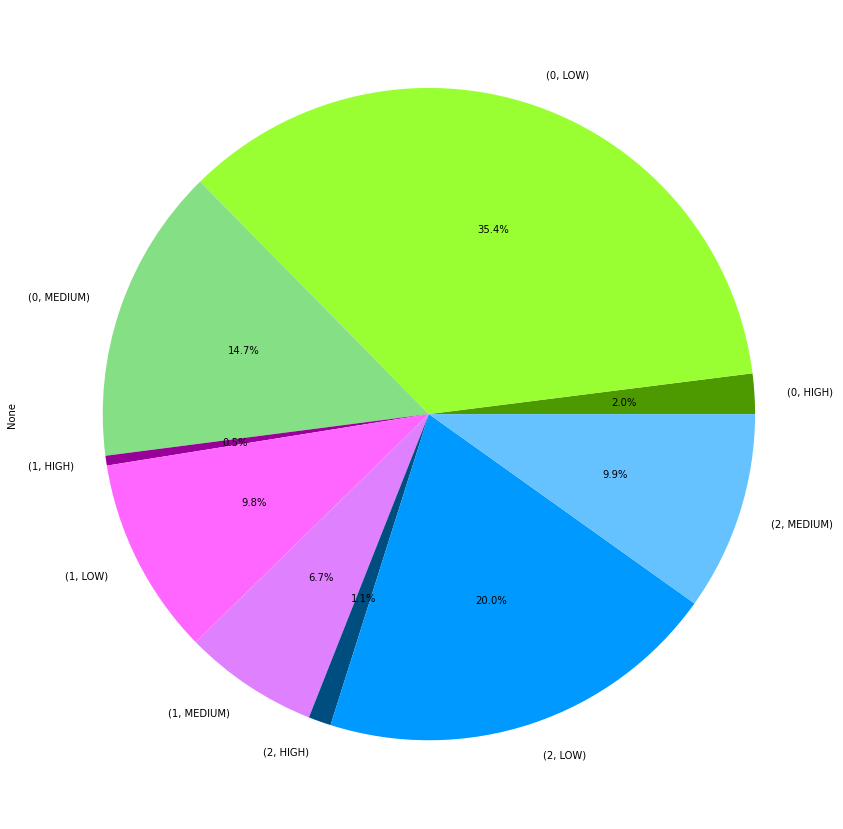

In [87]:
voice_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#4d9900","#99ff33","#85e085","#990099","#ff66ff","#df80ff","#004d80","#0099ff","#66c2ff"])

<AxesSubplot:xlabel='Cluster,VOICE_Categorical'>

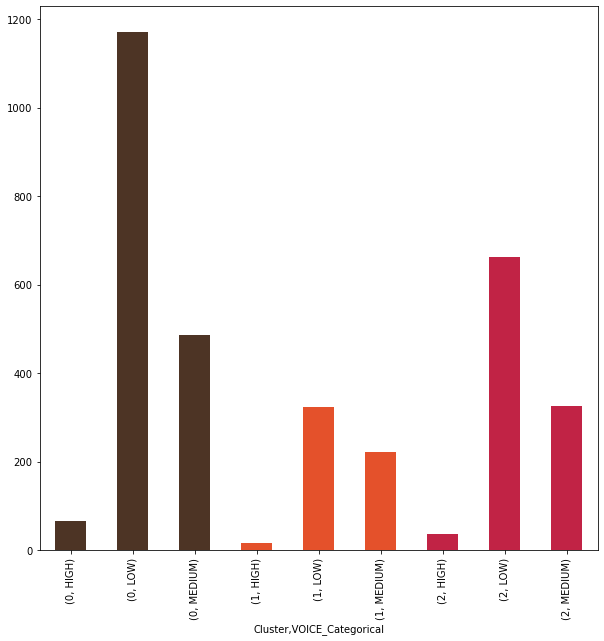

In [126]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345"]
voice_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

<AxesSubplot:xlabel='Cluster,VOICE_Categorical'>

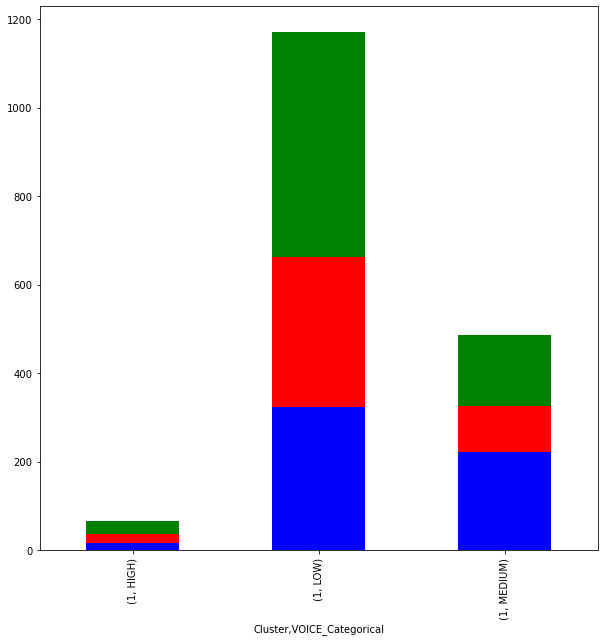

In [89]:
ax = voice_usage[:3].plot(stacked=True, kind="bar", figsize=(10,10), color="green")
voice_usage[6:9].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="red")
voice_usage[3:6].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="blue")
# Green - 0
# Red - 1
# Blue - 2

## IDD Usage

In [90]:
idd_usage = user_profile[["Cluster","IDD_Overall_Categorical"]].value_counts().sort_index()
idd_usage

Cluster  IDD_Overall_Categorical
0        HIGH                         37
         LOW                         592
         MEDIUM                       38
         NO                         1054
1        HIGH                         15
         LOW                         204
         MEDIUM                        9
         NO                          333
2        HIGH                         13
         LOW                         352
         MEDIUM                       35
         NO                          625
dtype: int64

<AxesSubplot:ylabel='None'>

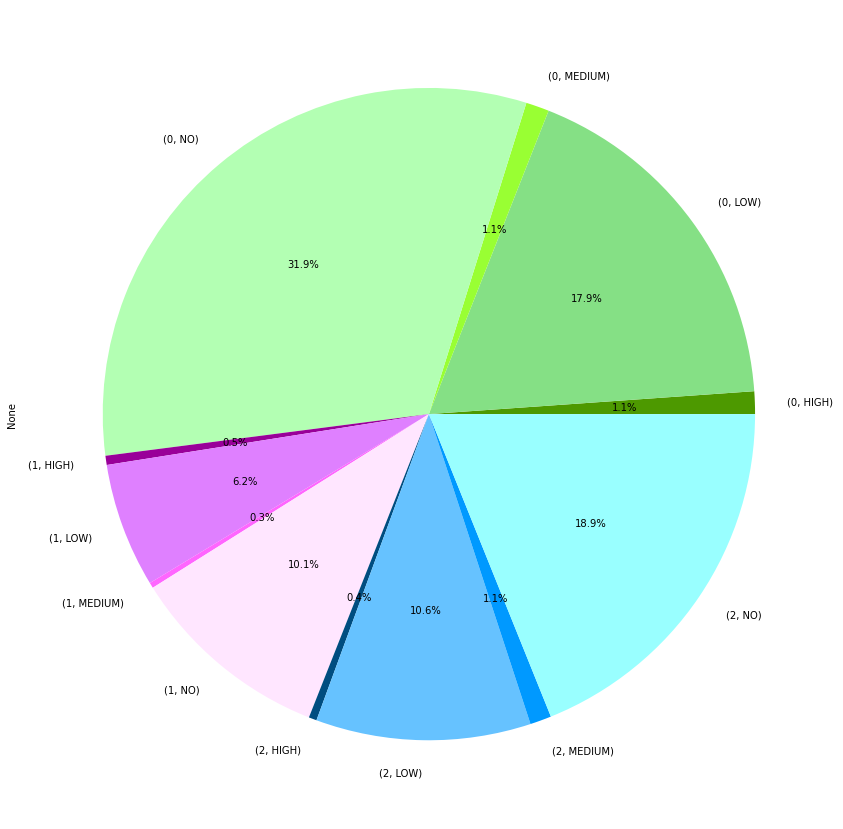

In [91]:
idd_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#4d9900","#85e085","#99ff33","#b3ffb3","#990099","#df80ff","#ff66ff","#ffe6ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,IDD_Overall_Categorical'>

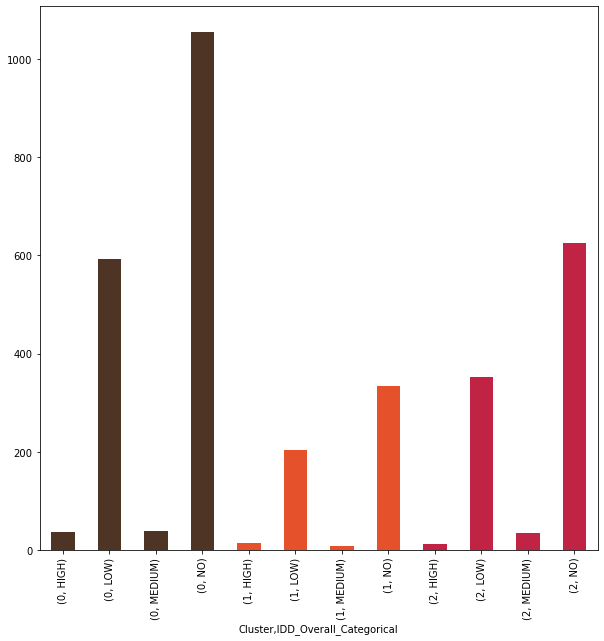

In [125]:
colors = ['#4D3425','#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
idd_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

<AxesSubplot:xlabel='Cluster,IDD_Overall_Categorical'>

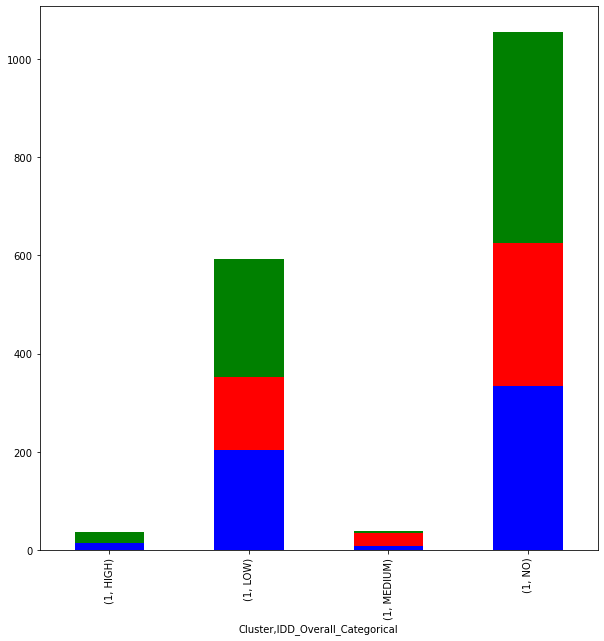

In [93]:
ax = idd_usage[:4].plot(stacked=True, kind="bar", figsize=(10,10), color="green")
idd_usage[8:12].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="red")
idd_usage[4:8].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="blue")
#  0 - Blue , 1 - Red , 2- Green

## BraodBand Usage analysis

In [95]:
bb_usage = user_profile[["Cluster","BB_Categorical"]].value_counts().sort_index()
bb_usage

Cluster  BB_Categorical
0        LOW                 55
         MEDIUM               3
         NO                1663
1        HIGH               101
         LOW                257
         MEDIUM             203
2        HIGH                95
         LOW                380
         MEDIUM             146
         NO                 404
dtype: int64

<AxesSubplot:ylabel='None'>

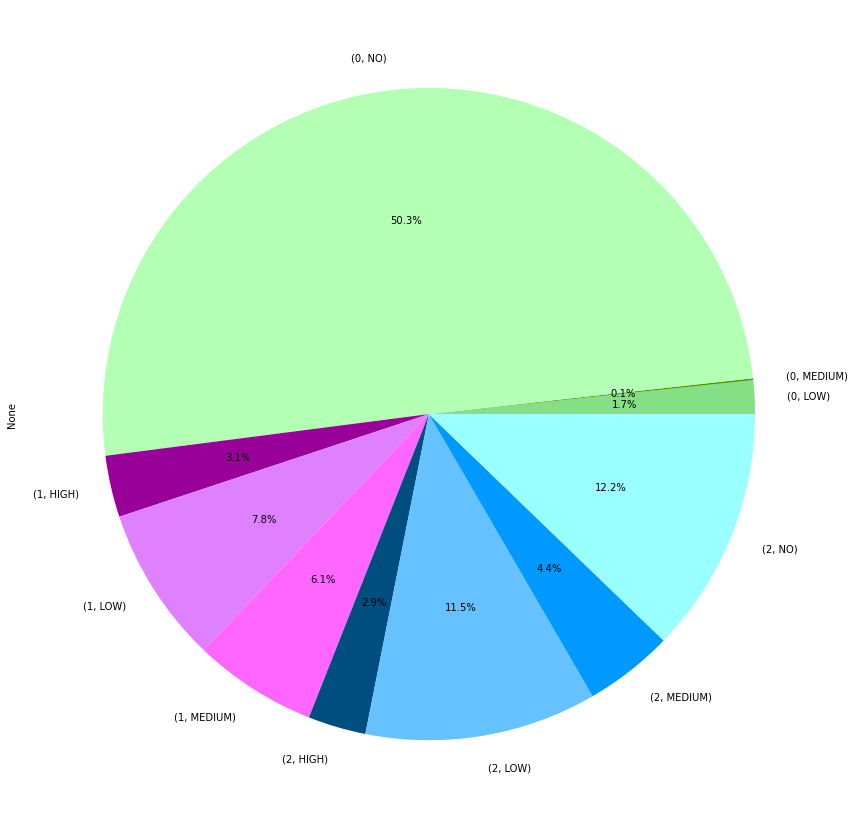

In [96]:
bb_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#85e085","#4d9900","#b3ffb3","#990099","#df80ff","#ff66ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,BB_Categorical'>

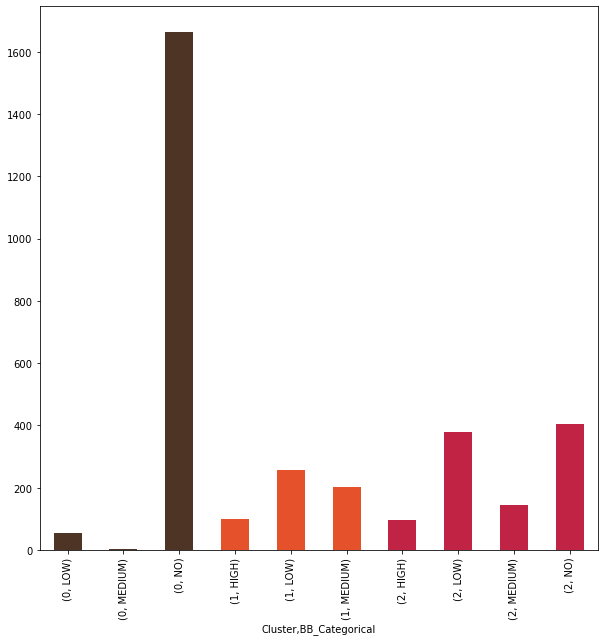

In [123]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
bb_usage.plot(stacked=True, kind="bar", figsize=(10,10), color=colors)

### Identifying factors for recommending Broadband for Cluster 0

In [98]:
# Cluster 2 --> 61% Broadband Users, first I'll Identify thier features and then compare with cluster 0

In [99]:
scaler = MinMaxScaler()
cluster_0["Location_Identifier"] = cluster_0["Location_Identifier"].astype("category")
cluster_0["Location_Identifier_Scaled"] = cluster_0["Location_Identifier"].cat.codes
cluster_0["Location_Identifier_Scaled"] = scaler.fit_transform(cluster_0["Location_Identifier_Scaled"].values.reshape(-1,1))

<ipython-input-99-4c4db900b709>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-4c4db900b709>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-4c4db900b709>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

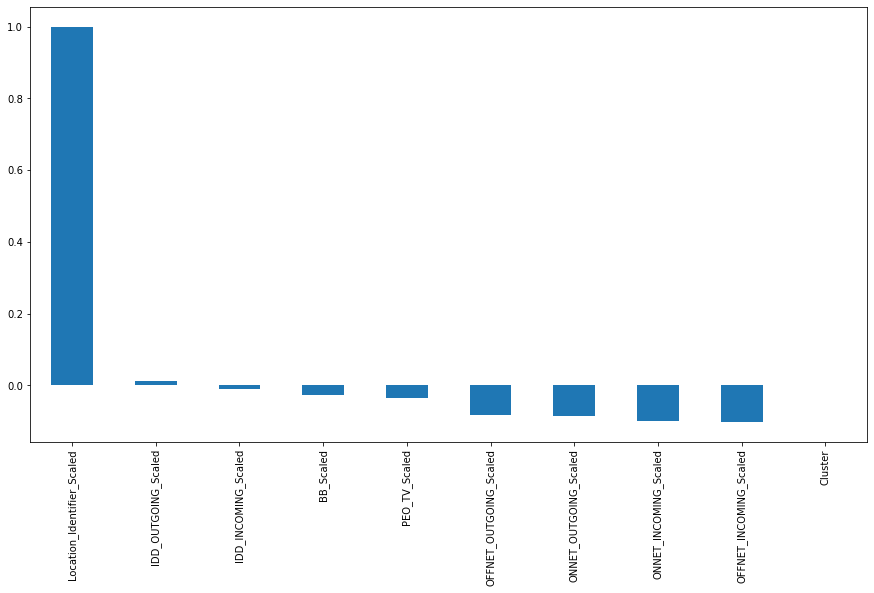

In [119]:
plt.figure(figsize=(15,8))
cluster_0.corr()['Location_Identifier_Scaled'].sort_values(ascending = False).plot(kind='bar')

In [121]:
cluster_0_loc = cluster_0.groupby('Location_Identifier').count()["event_source.hash"]

#### Feasible locations to offer BroadBand Internet compared to Double Play Users

In [101]:
cluster_2_bb_loc = cluster_2_bb.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

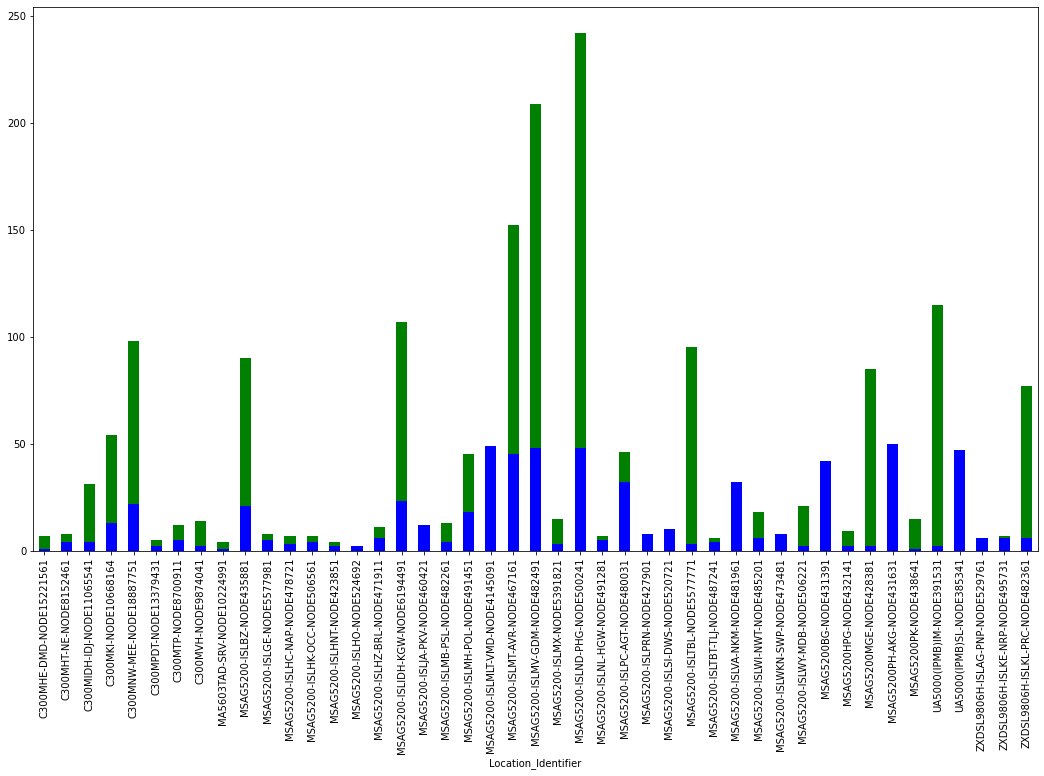

In [102]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
# green cluser 0
# blue Cluster 1 BB

In [103]:
loc_precentage=(cluster_2_bb_loc/cluster_0_loc)*100

In [104]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
MSAG5200-ISLGE-NODE5577981          62.500000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLJA-PKV-NODE460421      200.000000
MSAG5200-ISLMLT-VMD-NODE4145091    408.333333
MSAG5200-ISLNL-HGW-NODE491281       71.428571
MSAG5200-ISLPC-AGT-NODE480031       69.565217
MSAG5200-ISLPRN-NODE427901         400.000000
MSAG5200-ISLTBT-TLJ-NODE487241      80.000000
MSAG5200-ISLVA-NKM-NODE481961      177.777778
MSAG5200-ISLWI-NWT-NODE485201      100.000000
UA5000(IPMB)SL-NODE385341           61.038961
ZXDSL9806H-ISLAG-PNP-NODE529761     66.666667
ZXDSL9806H-ISLKE-NRP-NODE495731    120.000000
Name: event_source.hash, dtype: float64

In [105]:
# Relationship with Socio economic Factors

## PeoTV Usage analysis

In [106]:
peo_usage = user_profile[["Cluster","PEO_TV_Categorical"]].value_counts().sort_index()
peo_usage

Cluster  PEO_TV_Categorical
0        LOW                     54
         MEDIUM                   4
         NO                    1663
1        HIGH                   385
         LOW                     14
         MEDIUM                 162
2        HIGH                   211
         LOW                     58
         MEDIUM                 135
         NO                     621
dtype: int64

<AxesSubplot:ylabel='None'>

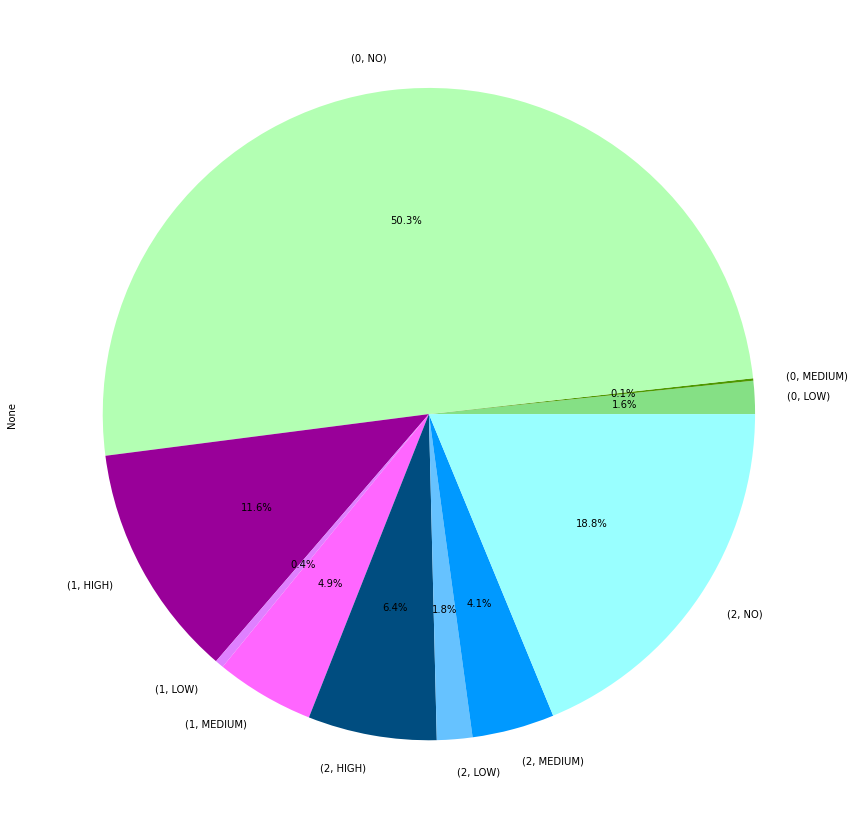

In [107]:
peo_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#85e085","#4d9900","#b3ffb3","#990099","#df80ff","#ff66ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,PEO_TV_Categorical'>

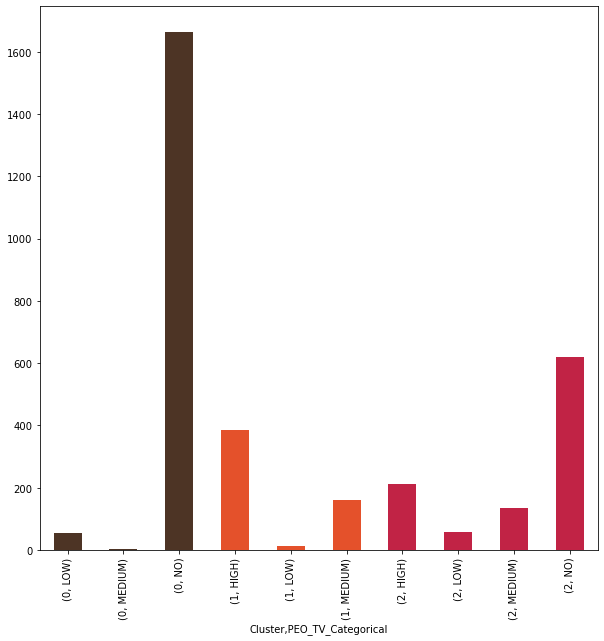

In [134]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
peo_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

### Identifying factors for recommending PeoTV for Cluster 0

In [109]:
# Cluster 2 --> 39% PeoTV Users, first I'll Identify thier features and then compare with cluster 0

#### Feasible locations to offer PeoTV compared to Double Play Users

In [110]:
cluster_2_peo_loc = cluster_2_peo.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

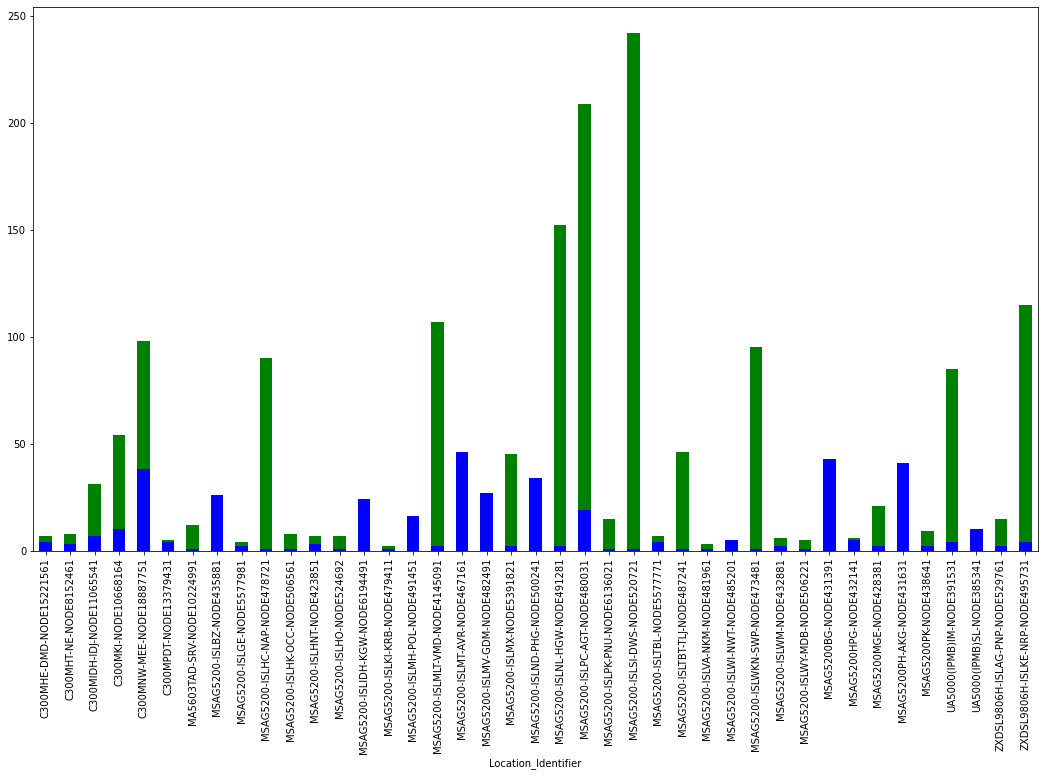

In [111]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
# green cluser 0
# blue Cluster 1 BB

In [112]:
loc_precentage=(cluster_2_peo_loc/cluster_0_loc)*100

In [113]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MPDT-NODE13379431               80.000000
MSAG5200-ISLHNT-NODE423851          75.000000
MSAG5200-ISLTBL-NODE5577771         66.666667
MSAG5200-ISLWI-NWT-NODE485201       83.333333
MSAG5200-ISLWM-NODE432881           66.666667
MSAG5200HPG-NODE432141             100.000000
ZXDSL9806H-ISLKE-NRP-NODE495731     80.000000
Name: event_source.hash, dtype: float64

### Feasible locations to offer peoTV and Broadband compared to Triple Play Users

In [114]:
cluster_1_peo_loc = cluster_1.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

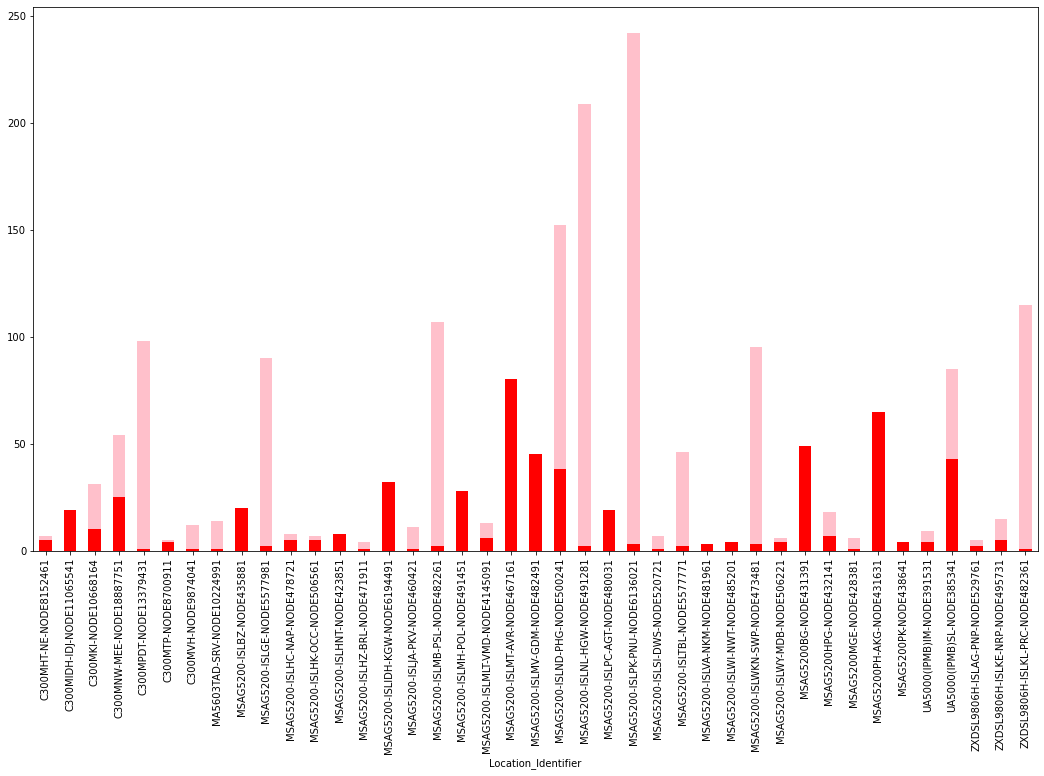

In [115]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
# pink cluser 0
# red Cluster 1 PeoTV

In [116]:
loc_precentage=(cluster_1_peo_loc/cluster_0_loc)*100

In [117]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461              62.500000
C300MIDH-IDJ-NODE11065541           61.290323
MSAG5200-ISLHC-NAP-NODE478721       71.428571
MSAG5200-ISLHK-OCC-NODE506561       71.428571
MSAG5200-ISLHNT-NODE423851         200.000000
MSAG5200-ISLMH-POL-NODE491451       62.222222
MSAG5200-ISLPK-PNU-NODE6136021     100.000000
MSAG5200-ISLWI-NWT-NODE485201       66.666667
MSAG5200HPG-NODE432141             140.000000
MSAG5200PK-NODE438641               80.000000
ZXDSL9806H-ISLKE-NRP-NODE495731    100.000000
Name: event_source.hash, dtype: float64